# Advanced Linear Regression Assignment

### Problem Statement:
Surprise Housing, a housing company headquartered in the United States, has made the strategic decision to expand its operations into the Australian market. Leveraging data analytics, the company aims to acquire properties at prices lower than their intrinsic values and subsequently sell them for a profit. To facilitate this expansion, the company has gathered a dataset comprising information from the sale of houses in Australia.
The resulting model will serve as a valuable tool for management, offering insights into the nuanced relationship between house prices and the identified variables. This understanding will empower the management to strategically adjust the firm's approach, focusing efforts on areas poised to generate optimal returns. Additionally, the model will provide a comprehensive overview of pricing dynamics in a new market, enhancing the management's comprehension of the intricacies involved.

### Objective:
The task at hand involves assessing potential properties for acquisition in the Australian market. To construct a regression model that incorporates regularization techniques. The objective is to predict the true values of these prospective properties, aiding Surprise Housing in making informed investment decisions based on the model's predictions.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.

## Section 1: Data Loading and Understanding

In [654]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score,mean_squared_error

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

import datetime

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [655]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [656]:
# Reading the dataset
source_df = pd.read_csv("train.csv", index_col=0) # Reading first column Id as index, as it is identifier column

In [657]:
source_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [658]:
# Summary of the dataset: 730 rows, 16 columns
print(source_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [659]:
# Evaluate each column
source_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [660]:
# List of features in the dataset
source_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [661]:
# Check the columns and null value list and percentage of null values (non zero) in differend columns
def checkNullPerc(source_df):
    col_list = list(source_df)
    null = []
    for i in source_df.isnull().sum()*100/source_df.shape[0]:
        null.append(i)
    data = {'columns': col_list, '% null': null}
    source_df_null = pd.DataFrame(data)
    source_df_null[source_df_null['% null'] != 0]
    return source_df_null.sort_values(by="% null", ascending=False).head(15)

source_df_null = checkNullPerc(source_df)
print(source_df_null)

         columns     % null
71        PoolQC  99.520548
73   MiscFeature  96.301370
5          Alley  93.767123
72         Fence  80.753425
56   FireplaceQu  47.260274
2    LotFrontage  17.739726
58   GarageYrBlt   5.547945
63    GarageCond   5.547945
57    GarageType   5.547945
59  GarageFinish   5.547945
62    GarageQual   5.547945
31  BsmtExposure   2.602740
34  BsmtFinType2   2.602740
30      BsmtCond   2.534247
29      BsmtQual   2.534247


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

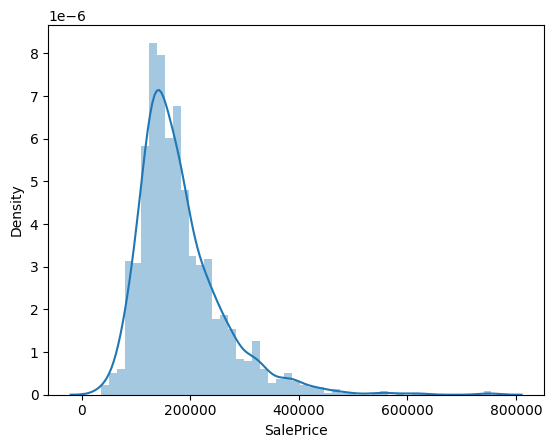

In [662]:
#Let's visualize the distribution of sale price before dropping 
sns.distplot(source_df['SalePrice'])

Distribution seems to be rightly skewed

## Section 2: Exploratory Data Analysis

In [663]:
#Identify separate numerical and non-numerical columns automatically
categorical_col = []
numerical_col = []

for col in list(source_df):
    if source_df[col].dtypes == 'object':
        categorical_col.append(col)  
    else:
        numerical_col.append(col)
print('Categorical columns:\n',categorical_col)

print('Numerical columns:\n',numerical_col)

Categorical columns:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageA

#### EDA on Numerical columns (Univariate)

Analysis for col  MSSubClass


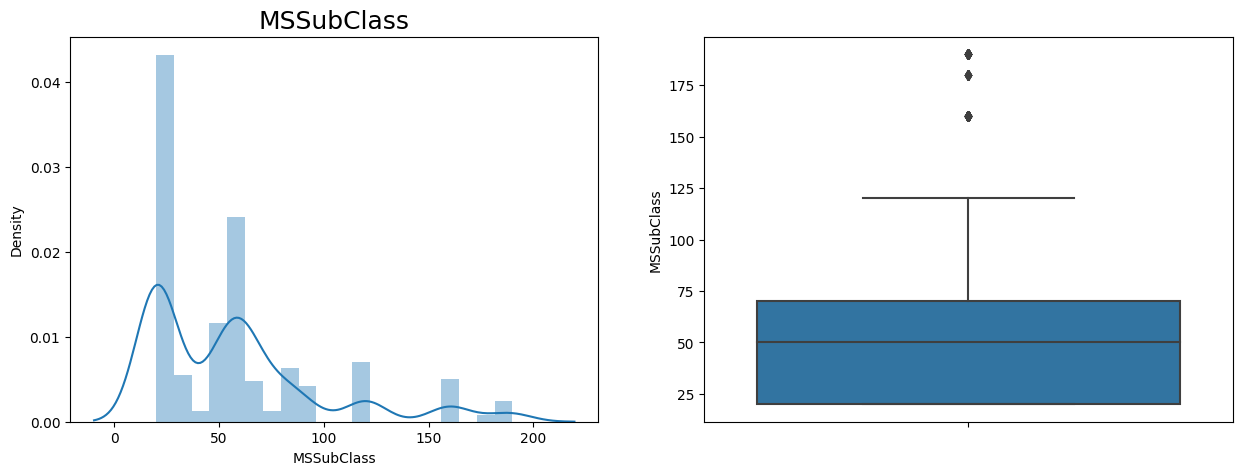

Analysis for col  LotFrontage


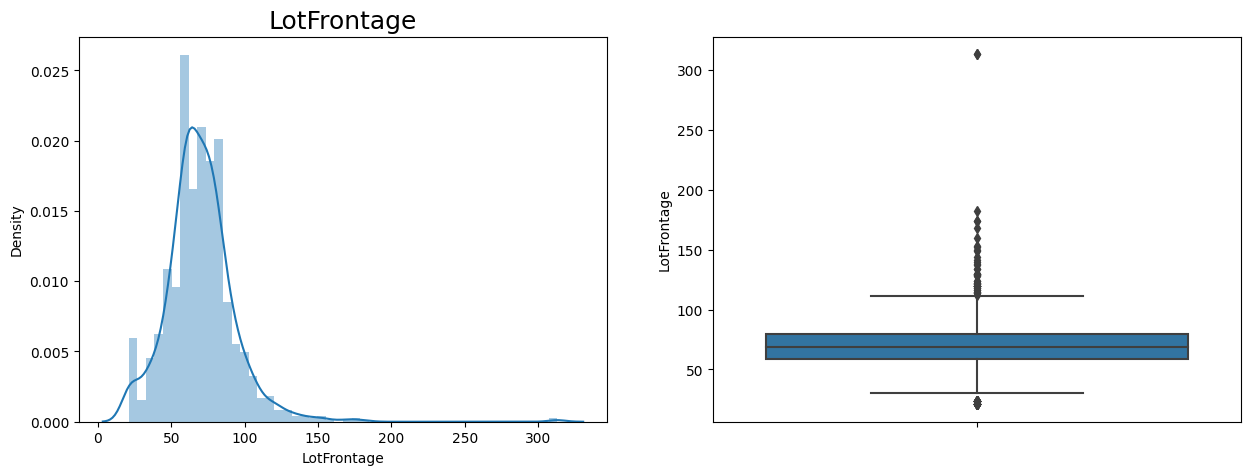

Analysis for col  LotArea


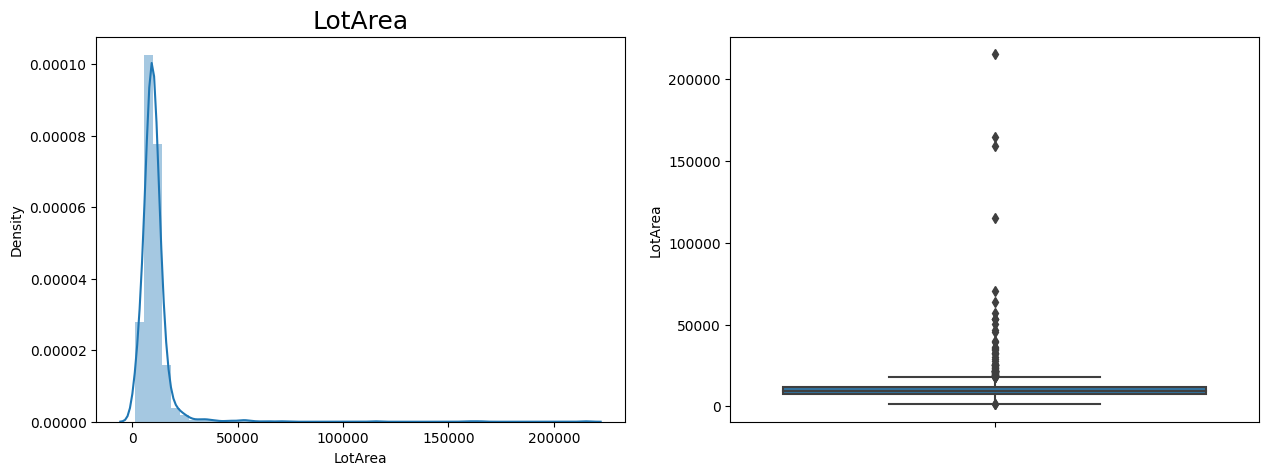

Analysis for col  OverallQual


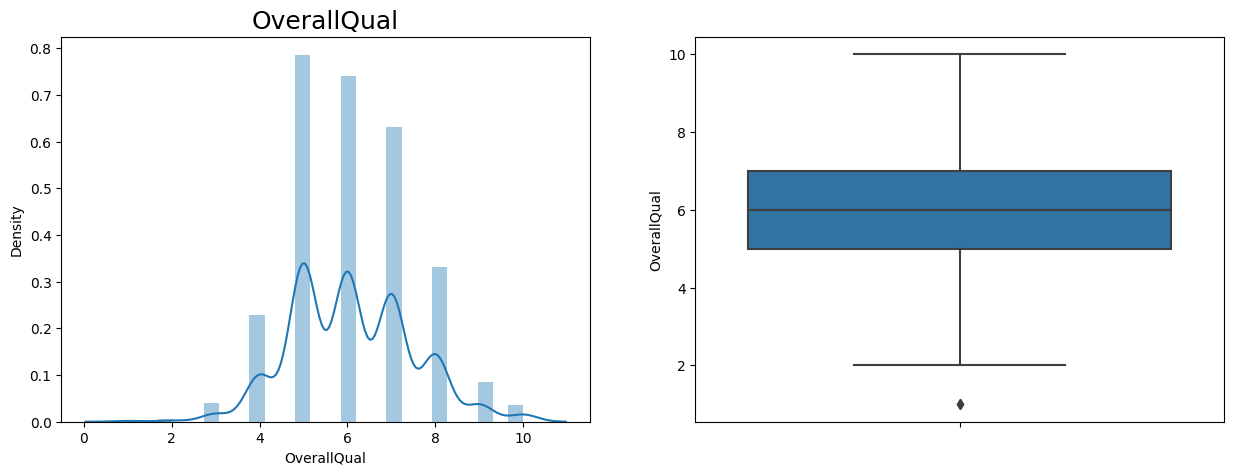

Analysis for col  OverallCond


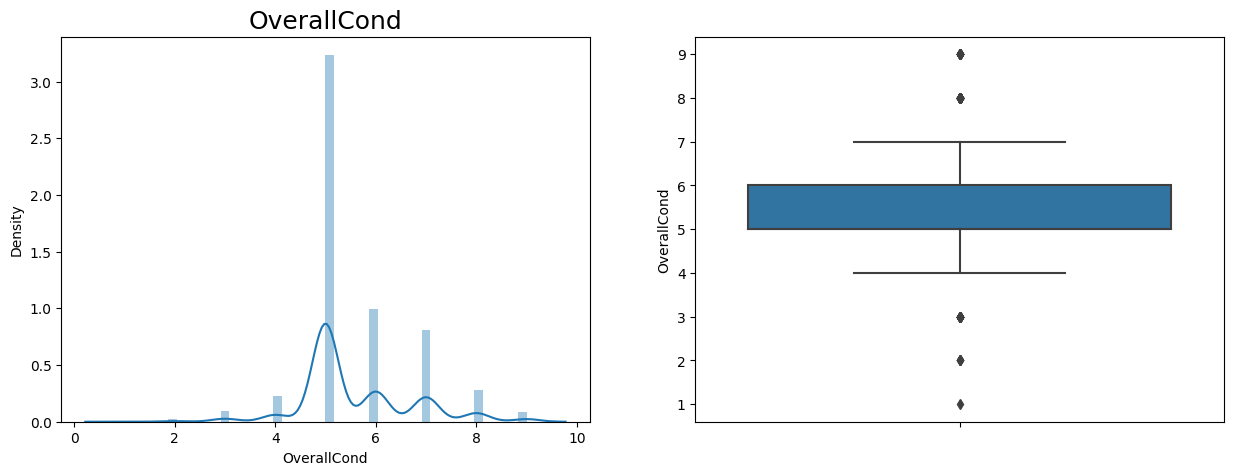

Analysis for col  YearBuilt


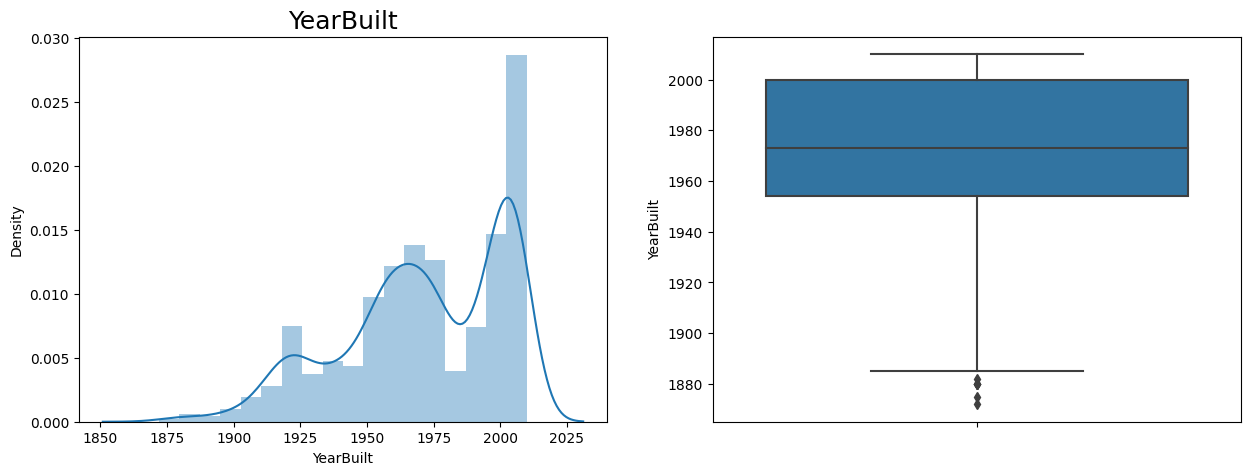

Analysis for col  YearRemodAdd


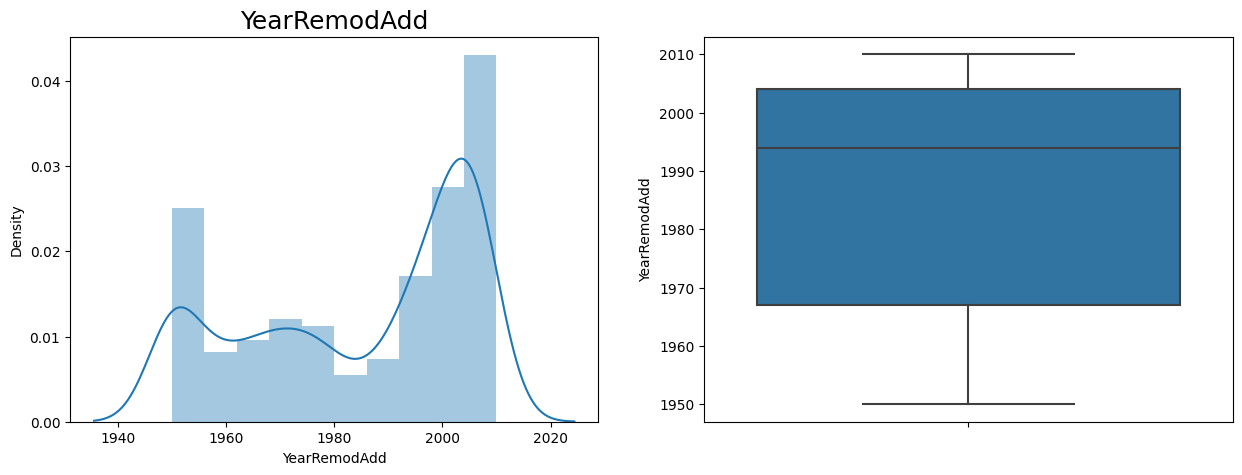

Analysis for col  MasVnrArea


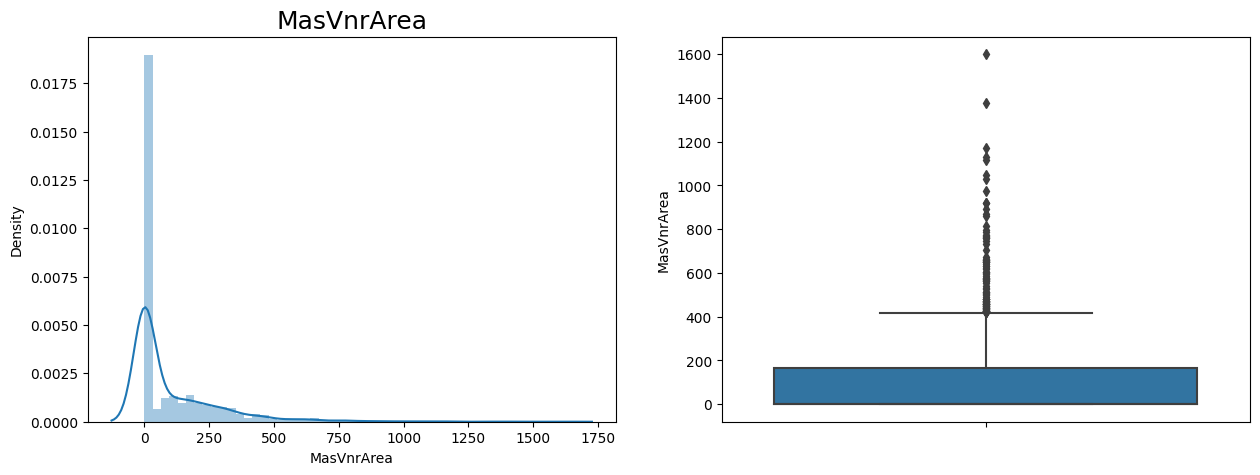

Analysis for col  BsmtFinSF1


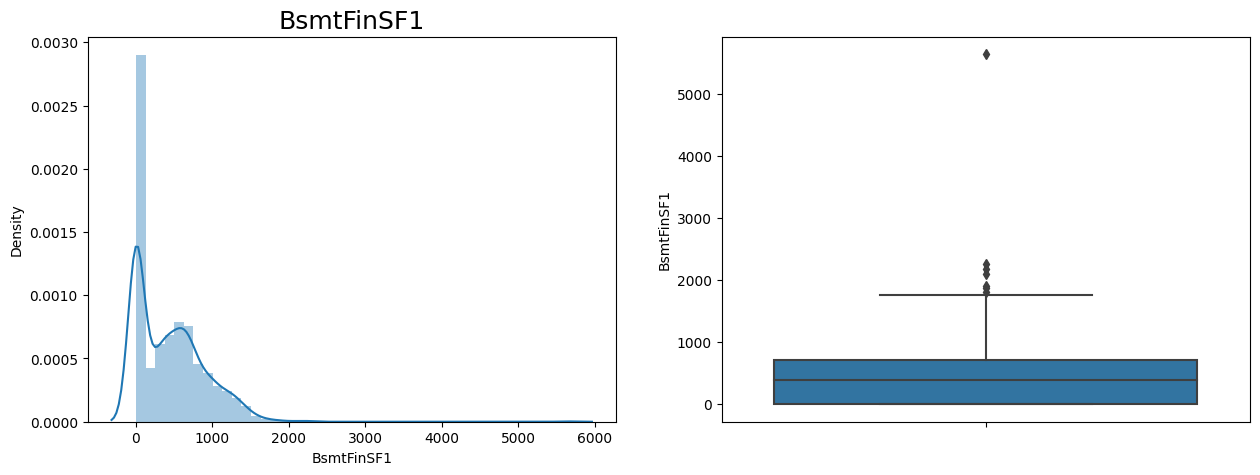

Analysis for col  BsmtFinSF2


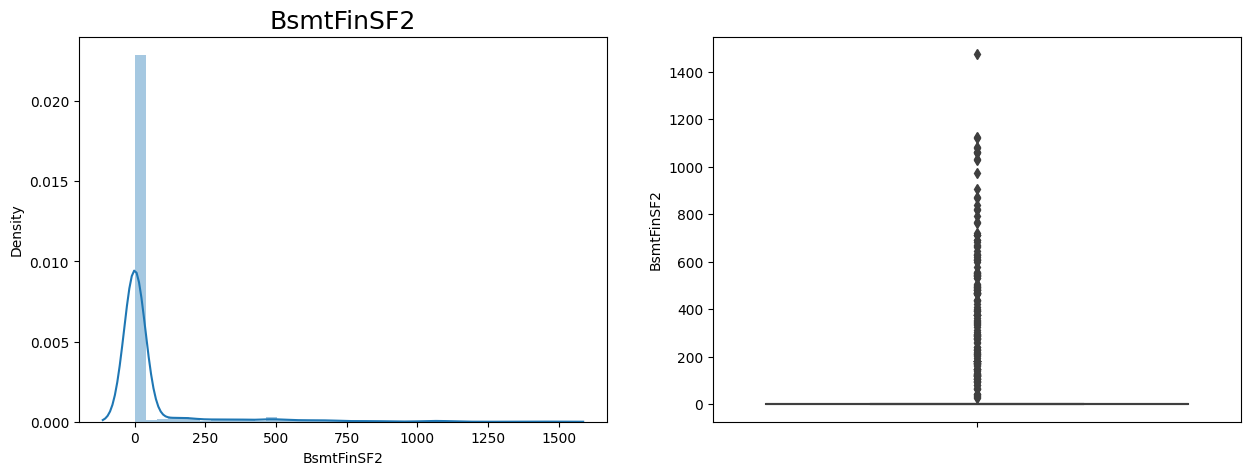

Analysis for col  BsmtUnfSF


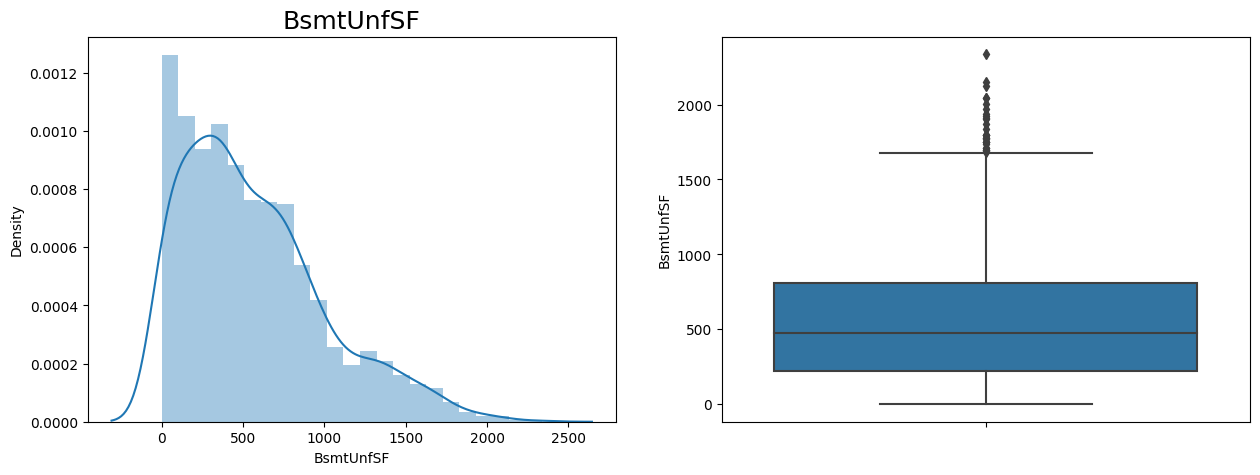

Analysis for col  TotalBsmtSF


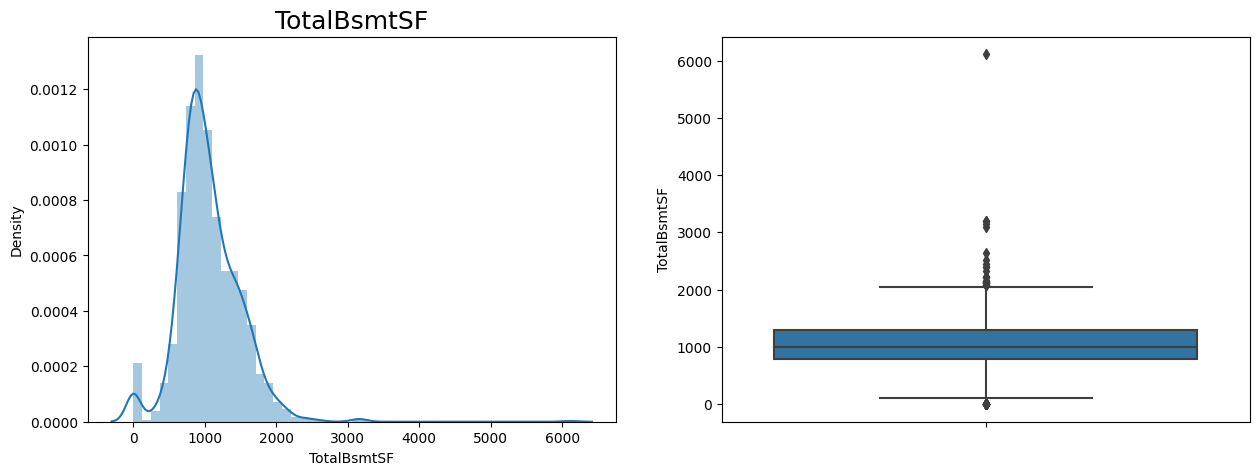

Analysis for col  1stFlrSF


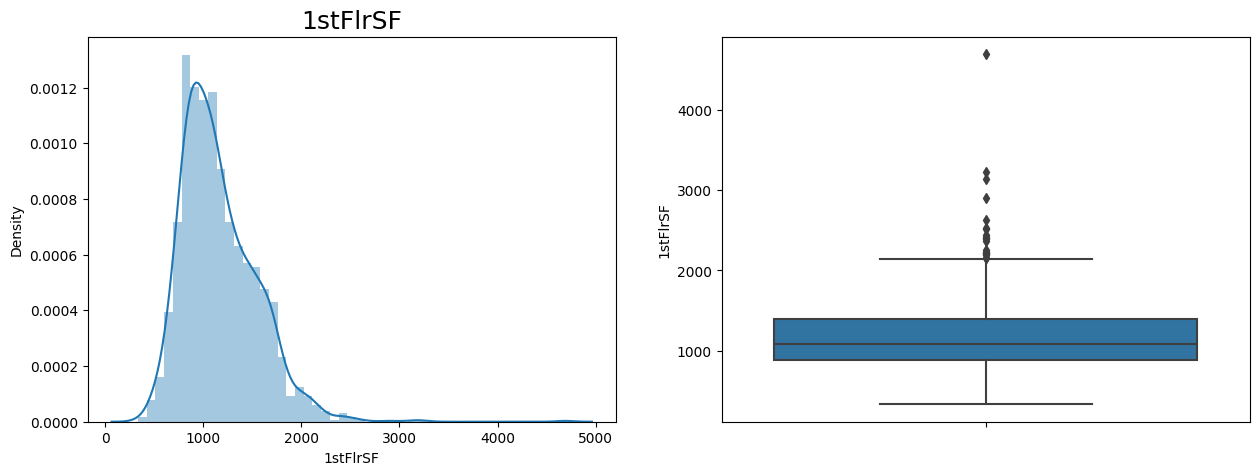

Analysis for col  2ndFlrSF


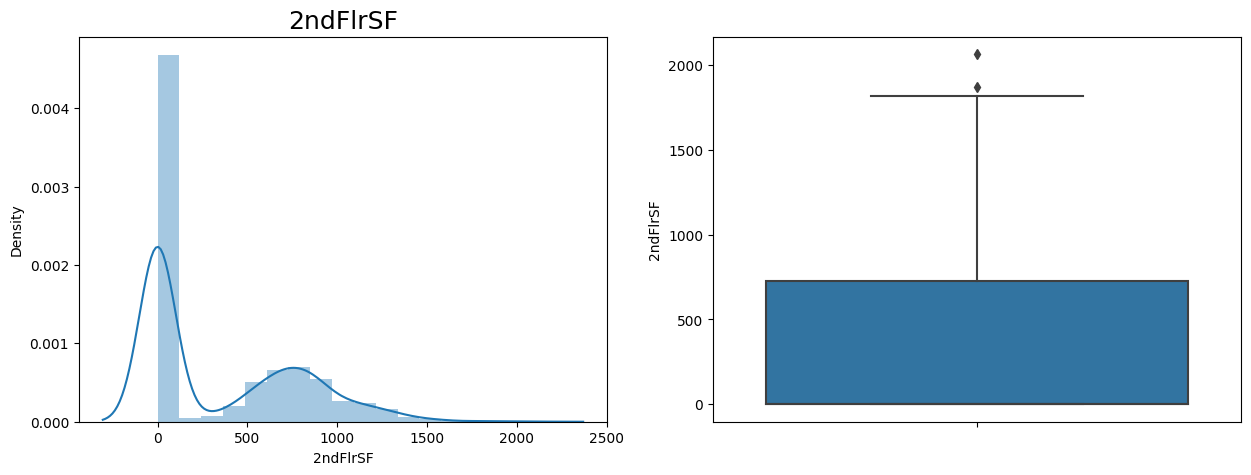

Analysis for col  LowQualFinSF


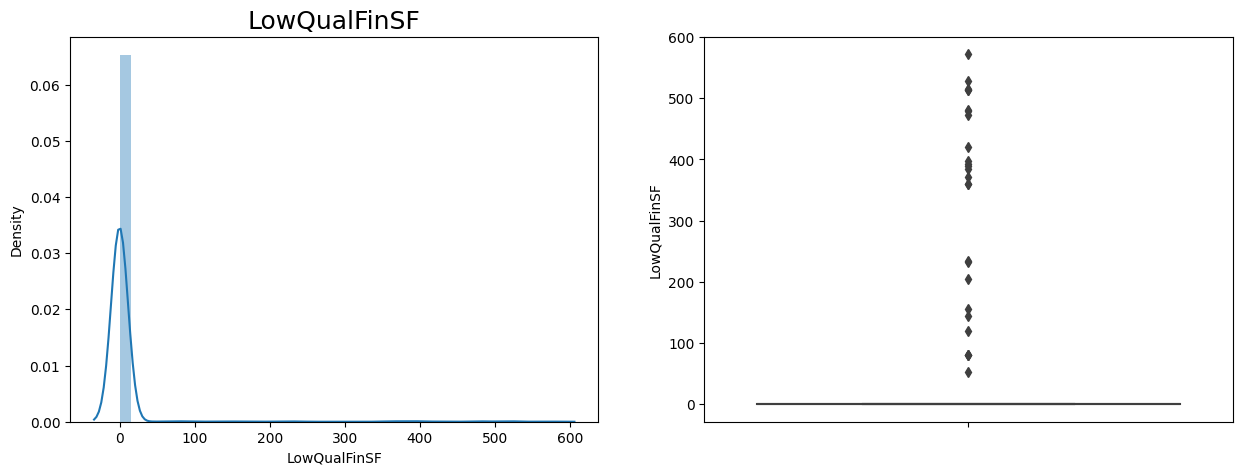

Analysis for col  GrLivArea


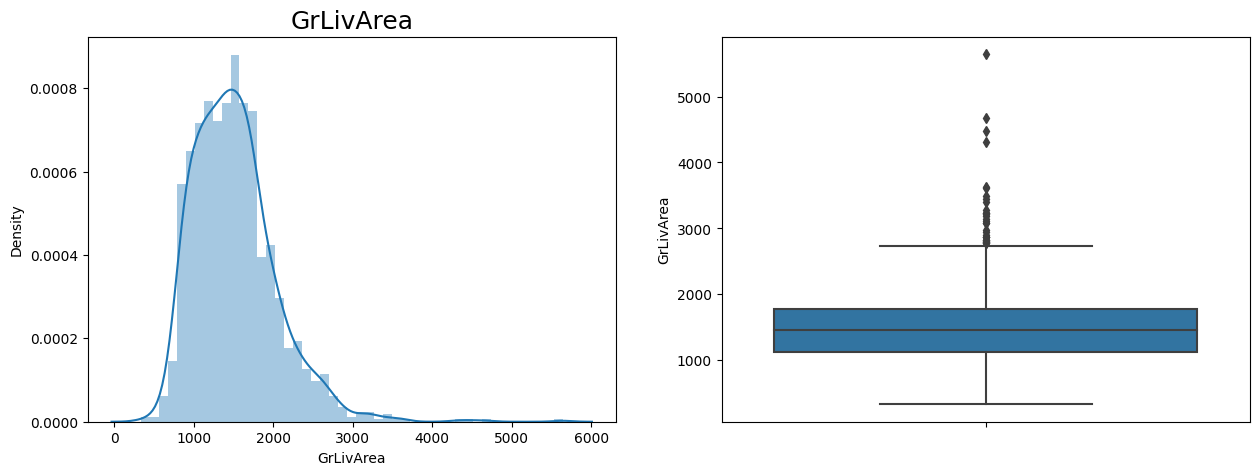

Analysis for col  BsmtFullBath


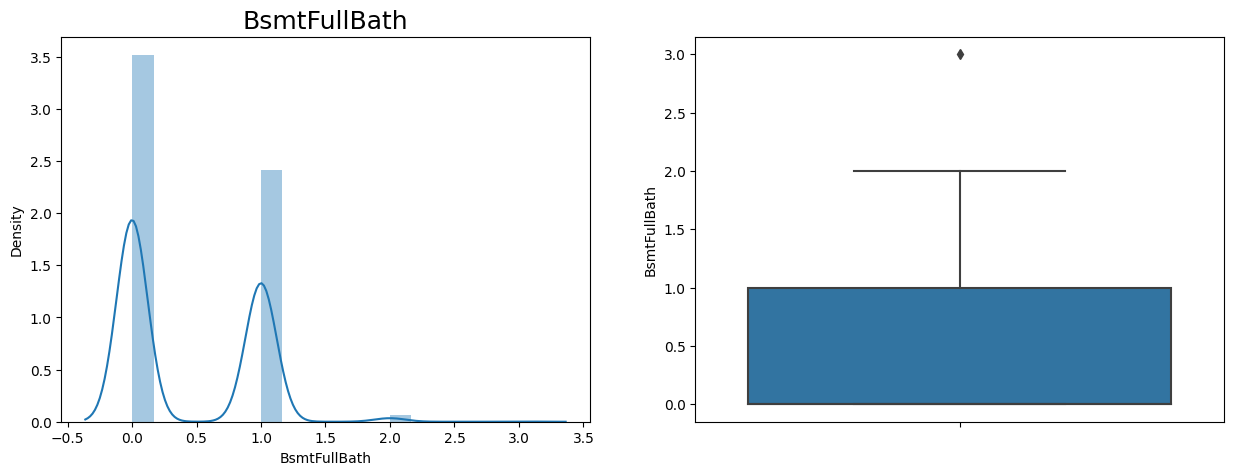

Analysis for col  BsmtHalfBath


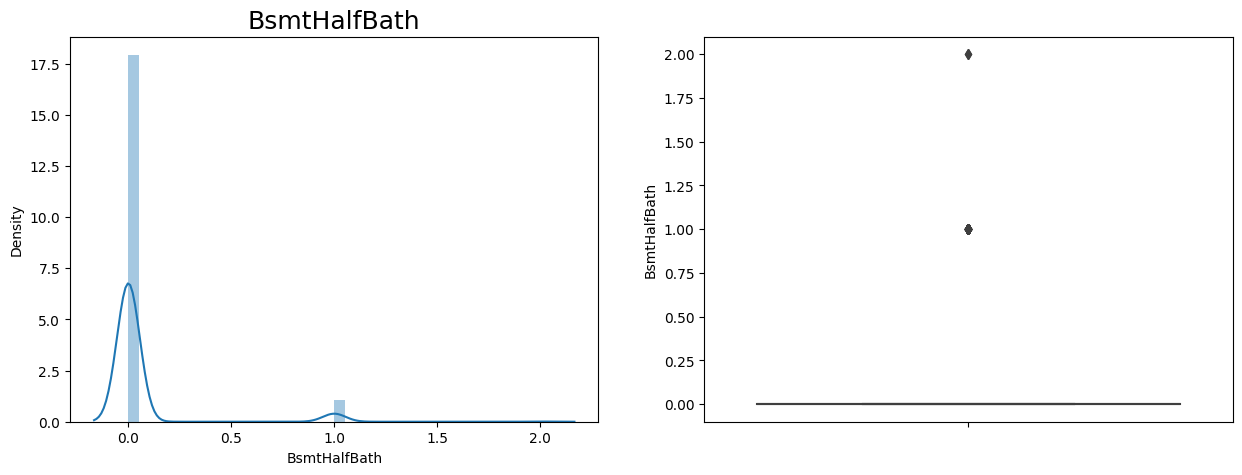

Analysis for col  FullBath


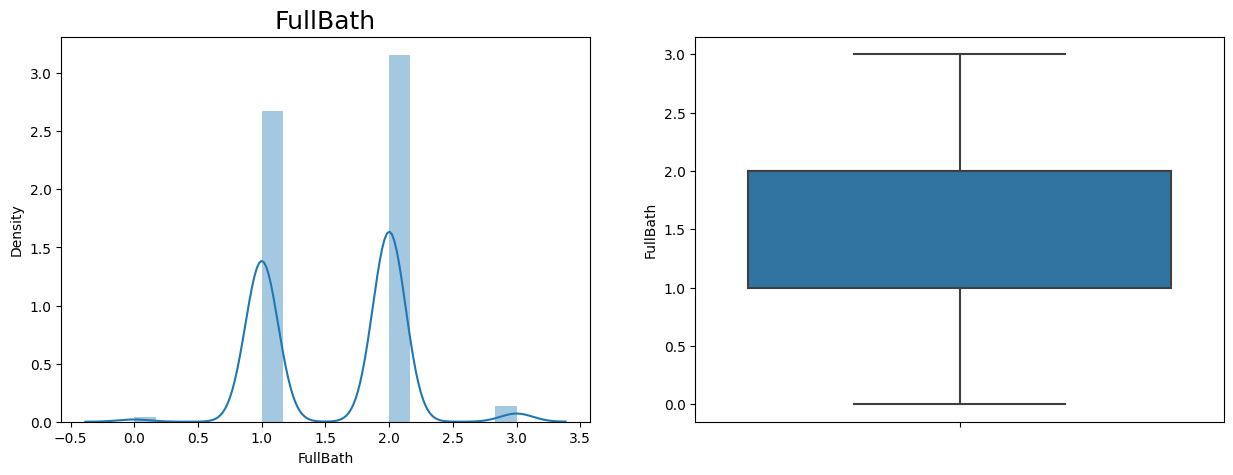

Analysis for col  HalfBath


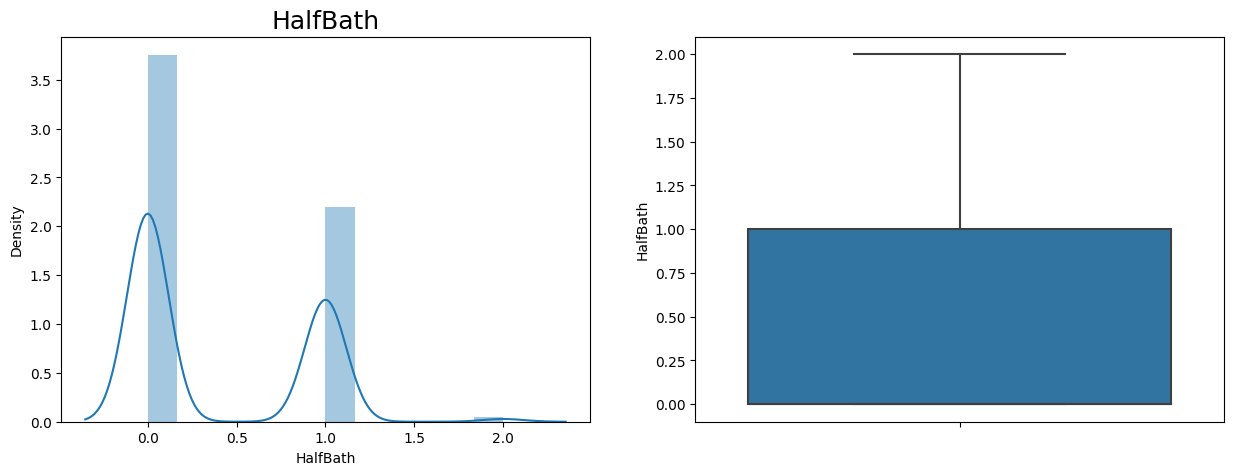

Analysis for col  BedroomAbvGr


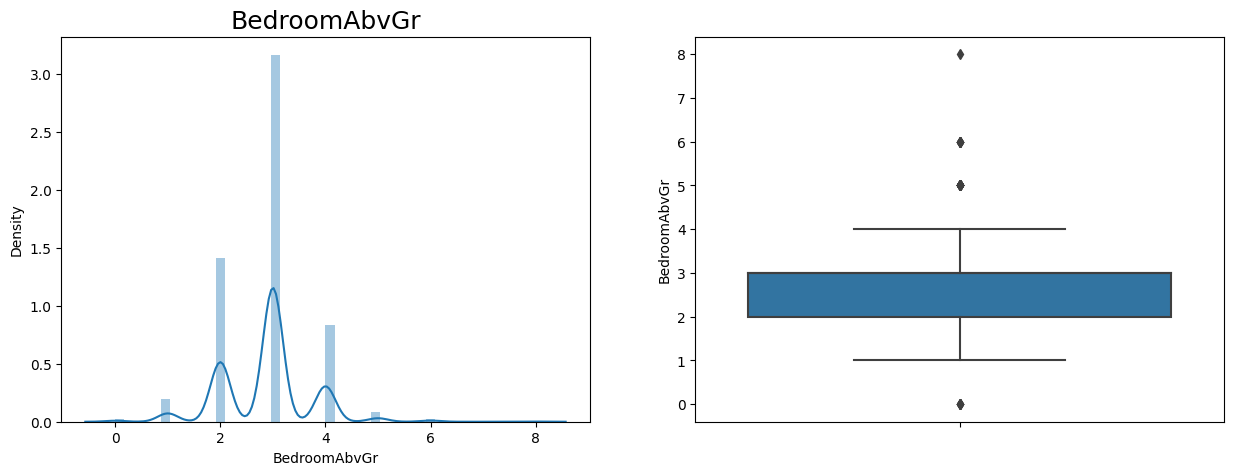

Analysis for col  KitchenAbvGr


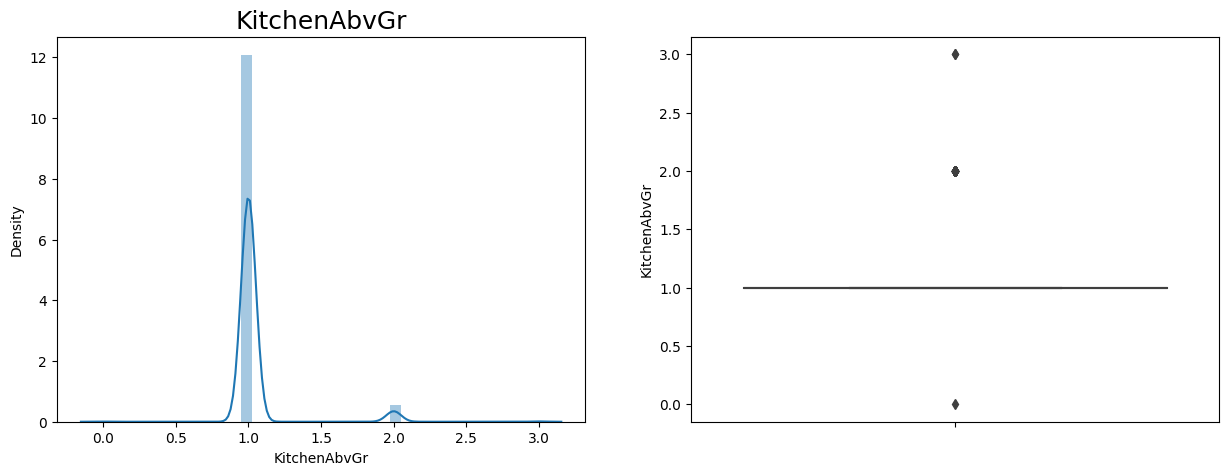

Analysis for col  TotRmsAbvGrd


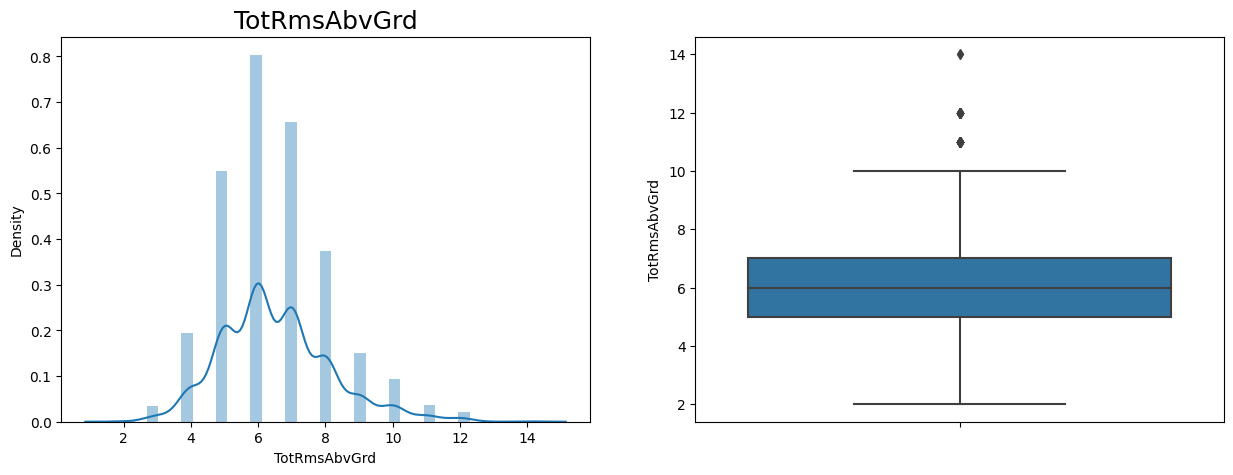

Analysis for col  Fireplaces


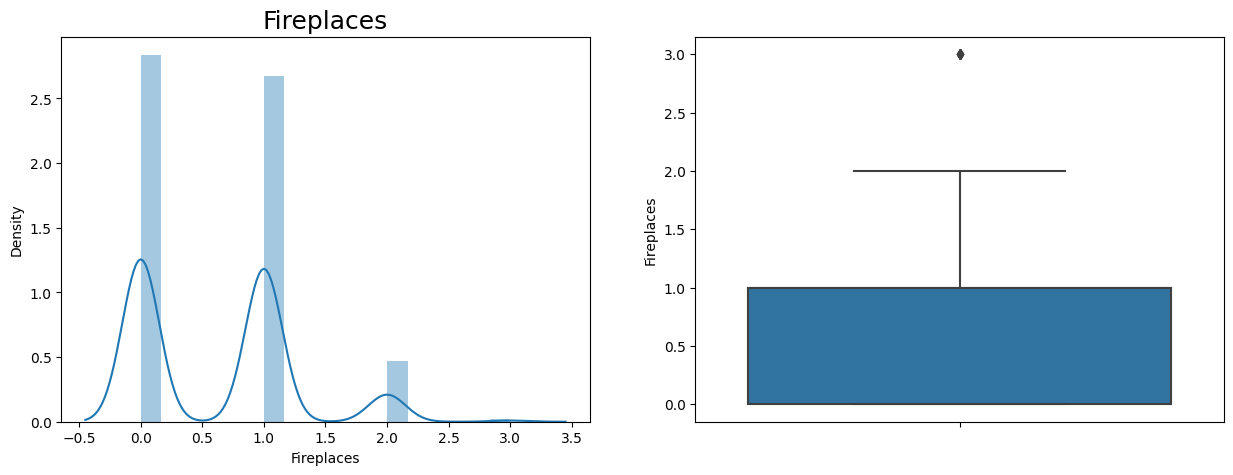

Analysis for col  GarageYrBlt


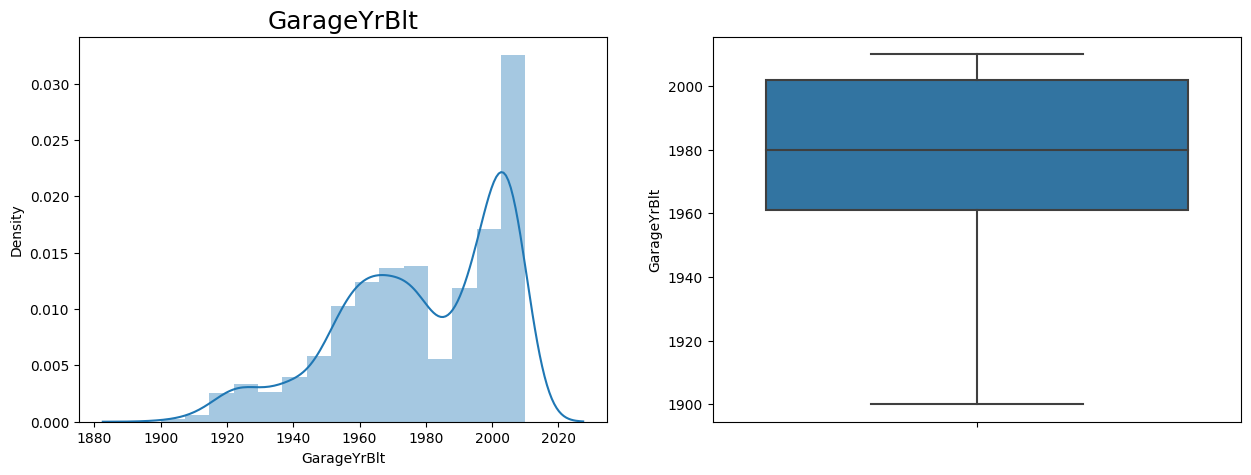

Analysis for col  GarageCars


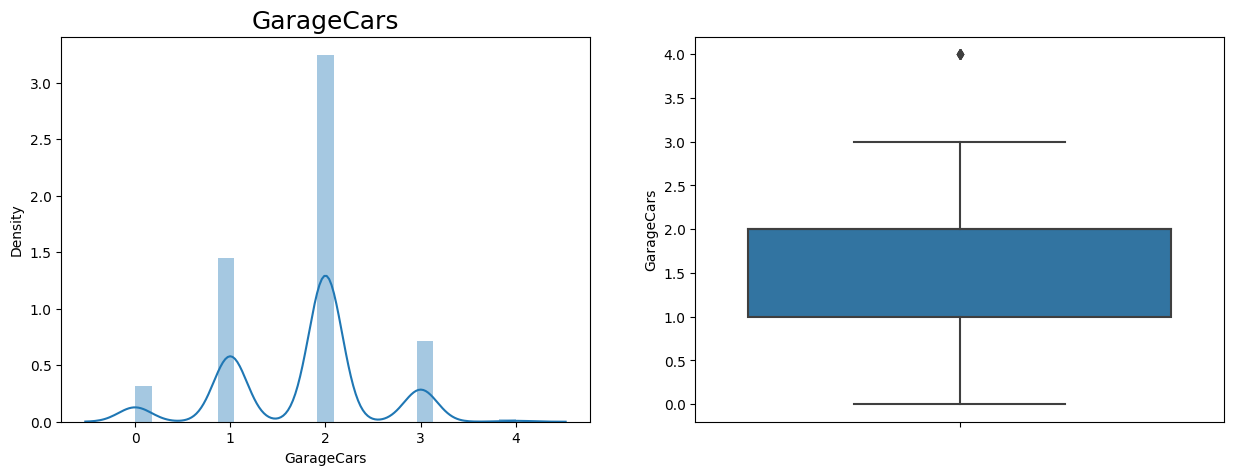

Analysis for col  GarageArea


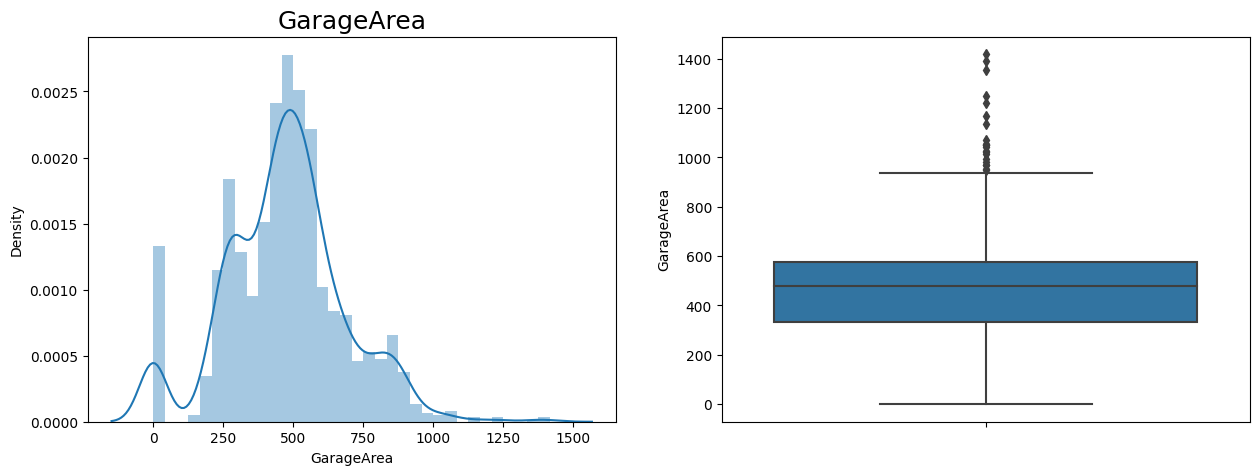

Analysis for col  WoodDeckSF


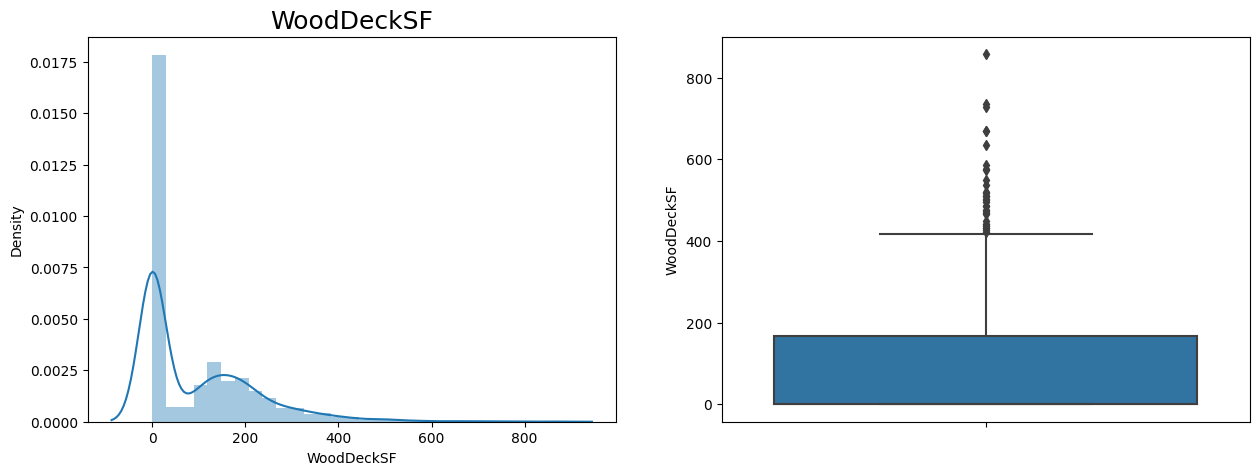

Analysis for col  OpenPorchSF


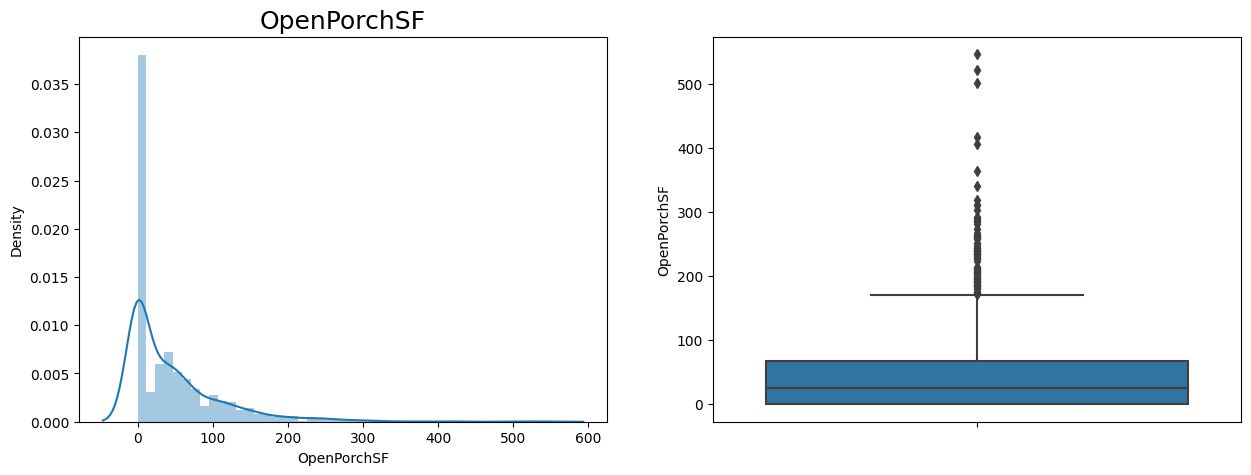

Analysis for col  EnclosedPorch


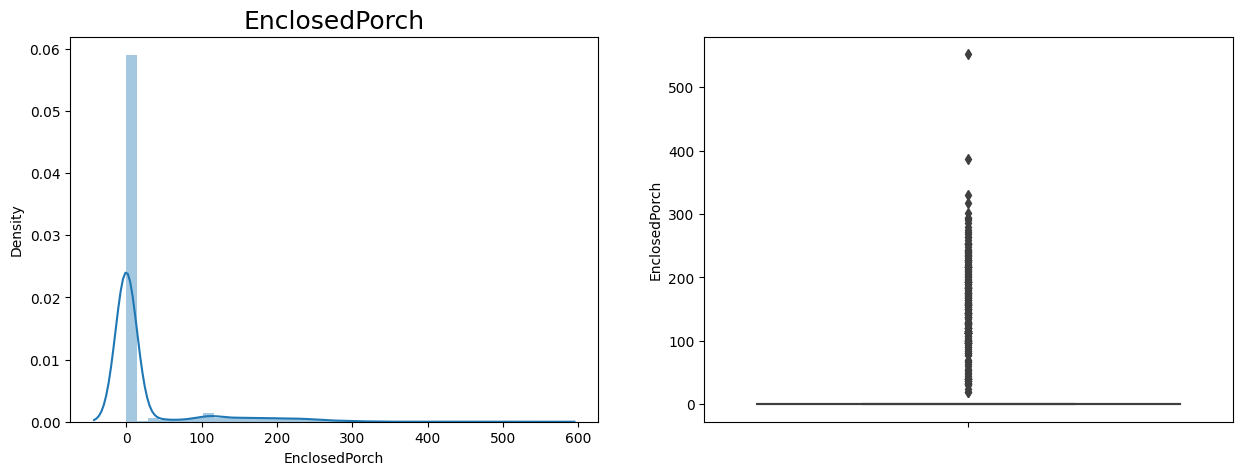

Analysis for col  3SsnPorch


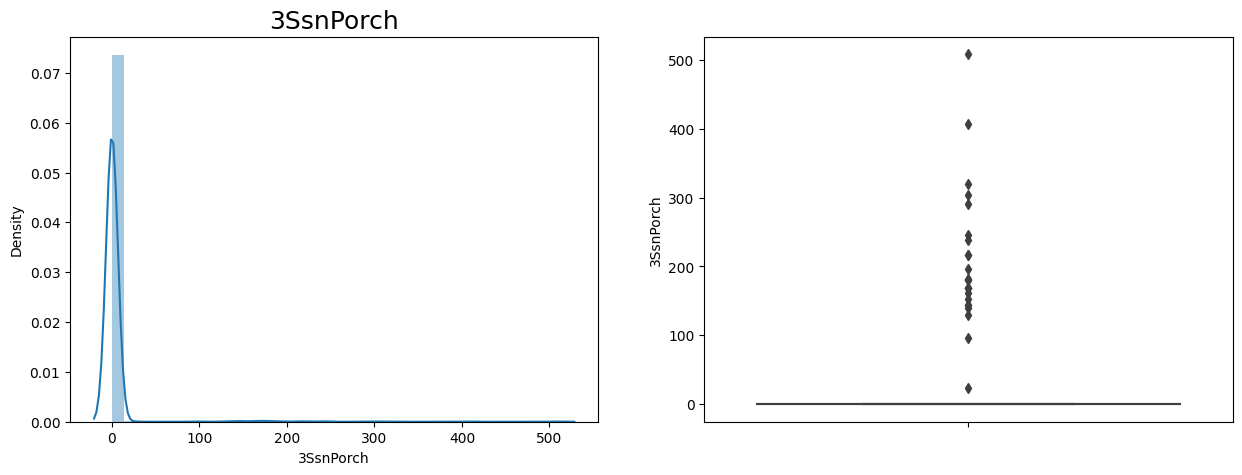

Analysis for col  ScreenPorch


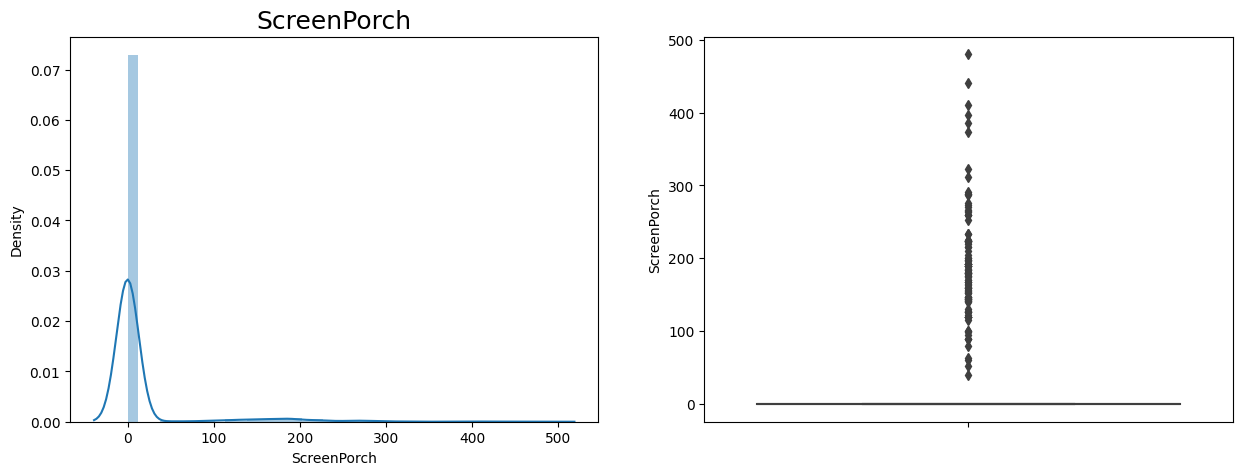

Analysis for col  PoolArea


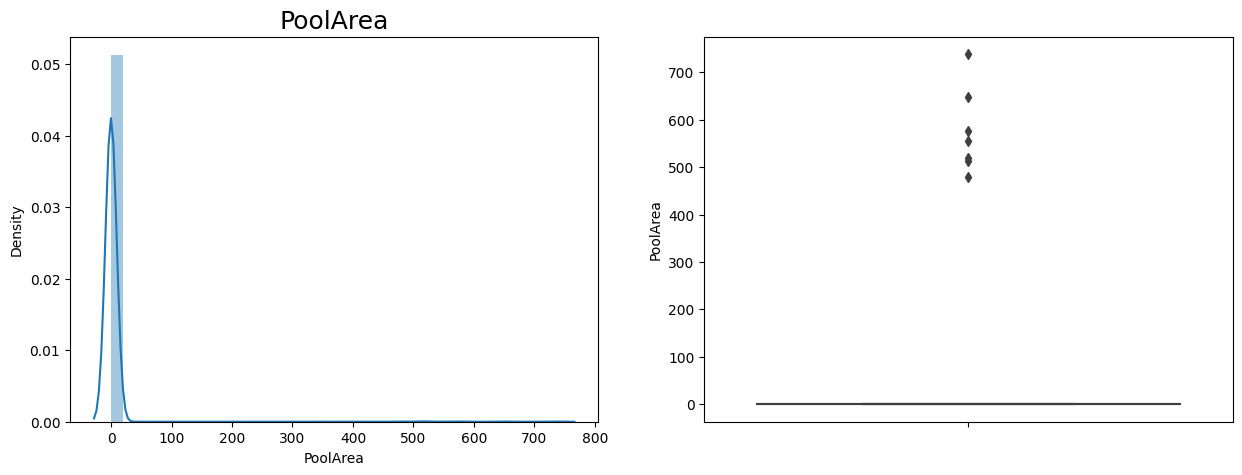

Analysis for col  MiscVal


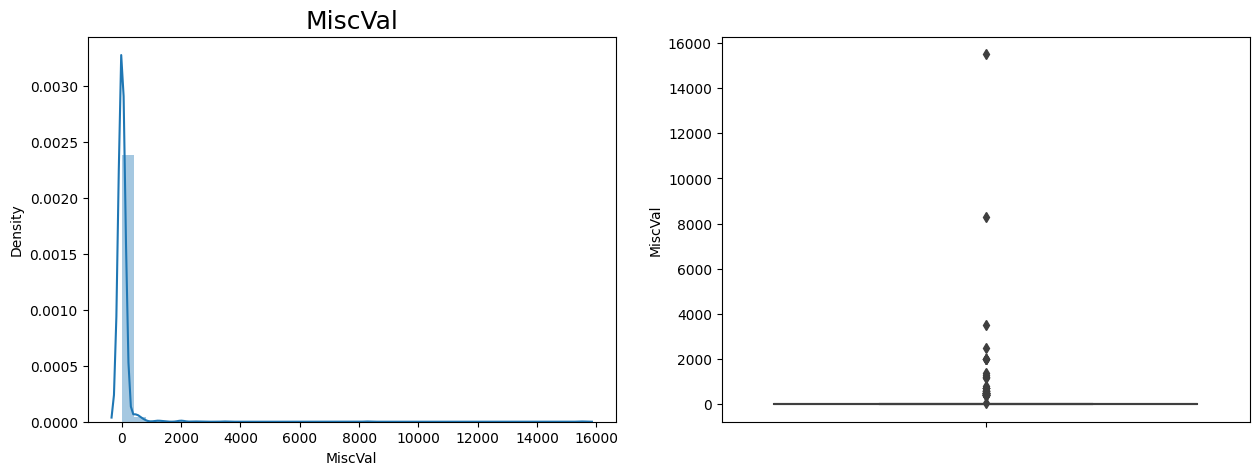

Analysis for col  MoSold


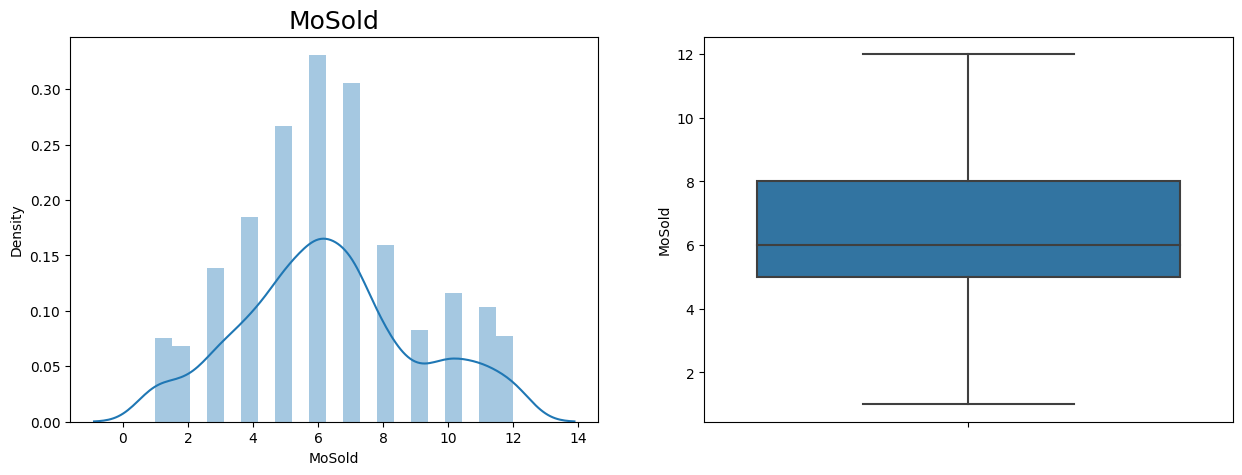

Analysis for col  YrSold


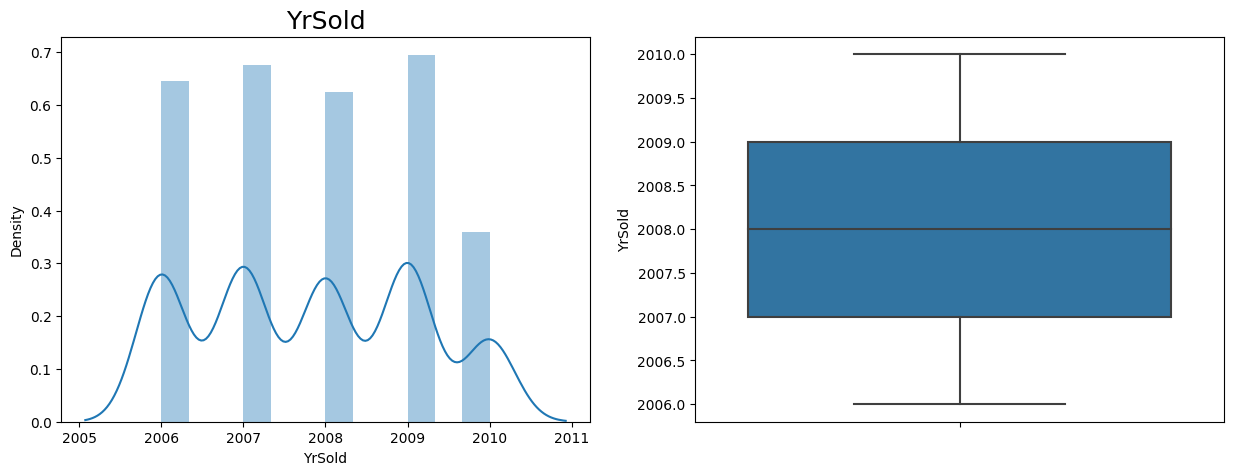

Analysis for col  SalePrice


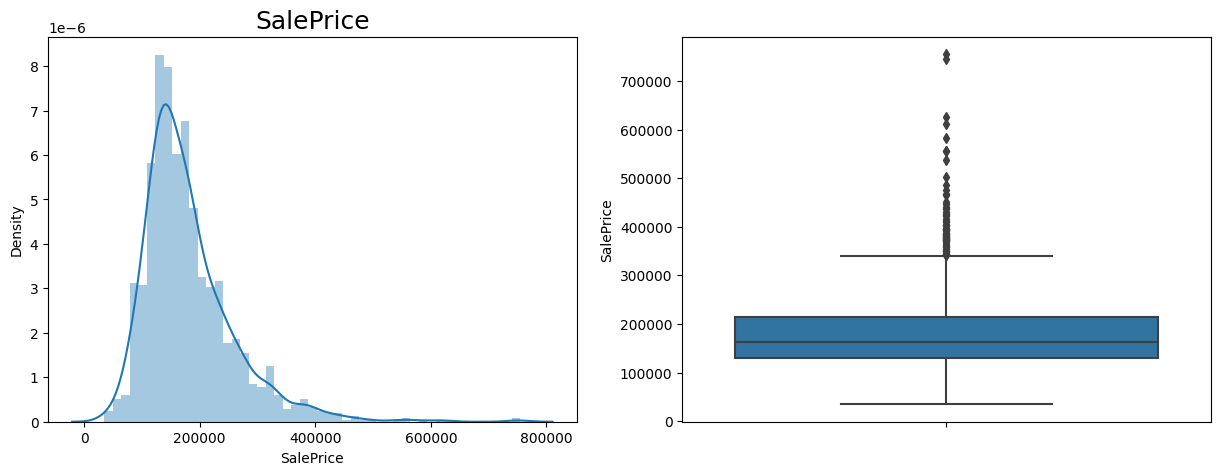

In [664]:
# View the distribution of all numeric variables using histograms and boxplots

for col in numerical_col:
    print("Analysis for col ", col)
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(source_df[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(y =col, data=source_df)
    plt.show()  

#### Observation: 
1. Most of the columns like LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, LowQualFinSF, BsmtHalfBath, WoodDeckSF, OpenProchSF, EnclosedPorch, 3SsnPorch, ScreenProch, PoolArea, MiscVal fields are rightly skewed and seems to have lot of outliers, hence outliers needs to be handled
2. Many of the numerical columns are having non-normal distribution

#### EDA on Categorical columns(Univariate)

In [665]:
## View the unique values of all Categorical columns
for col in categorical_col:
    print(col)
    print(source_df[col].unique(), '\n')

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
[nan 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 

Ex

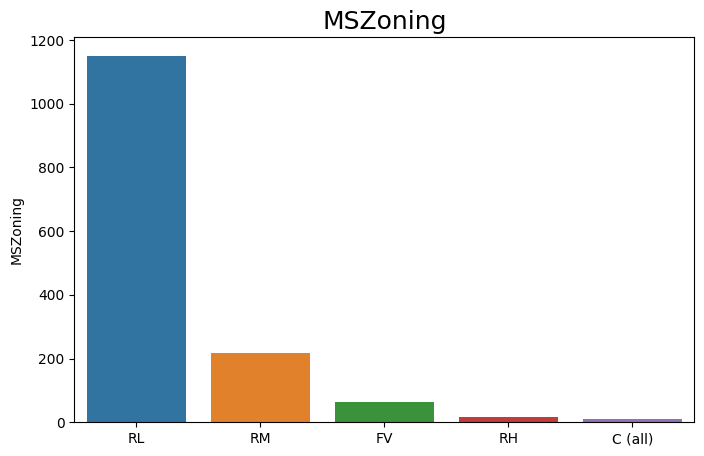

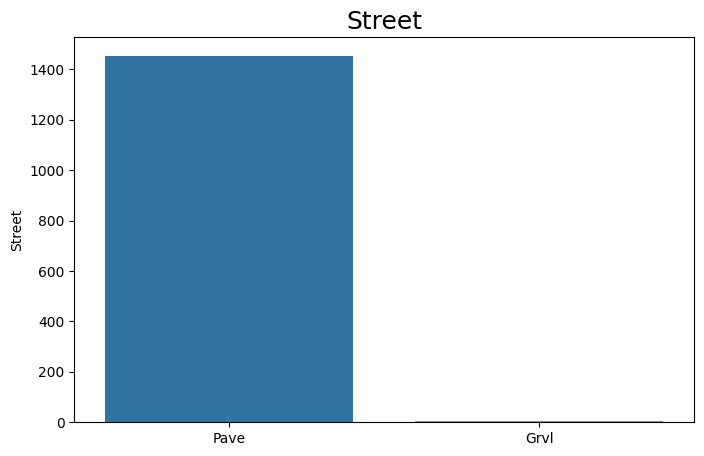

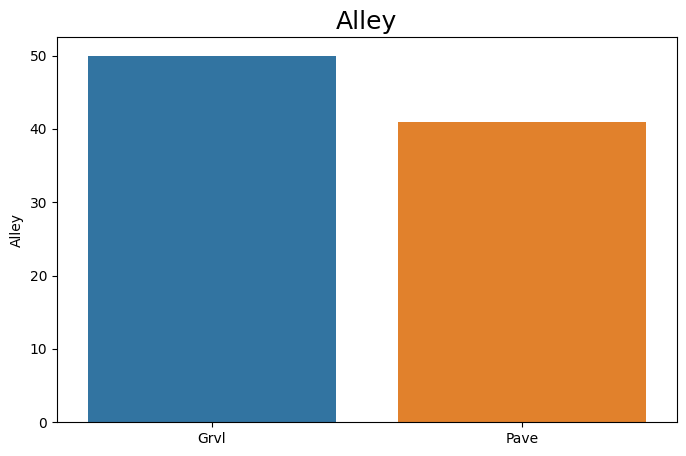

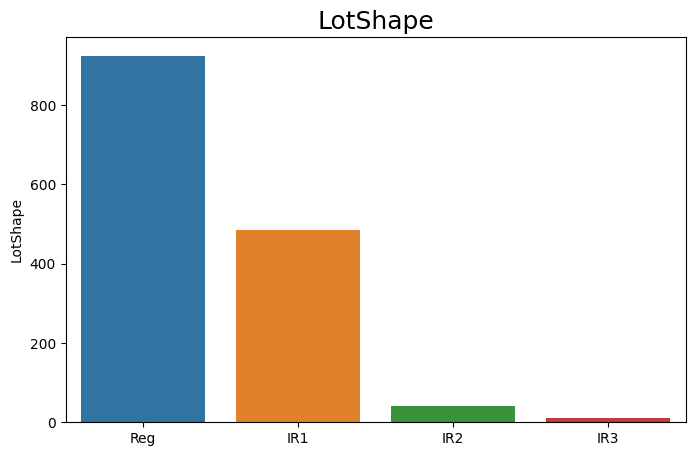

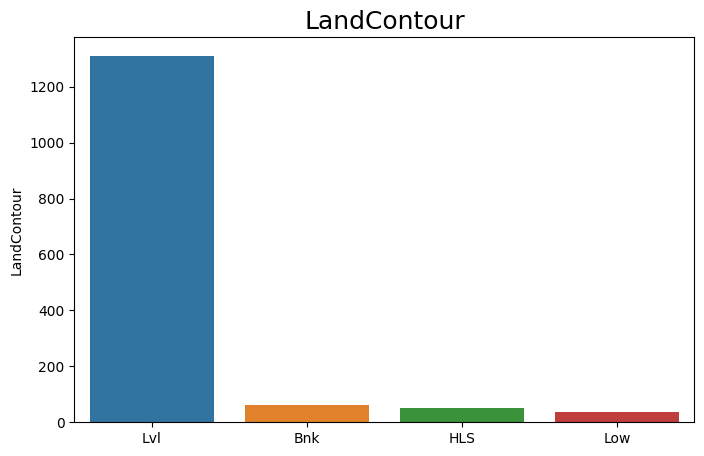

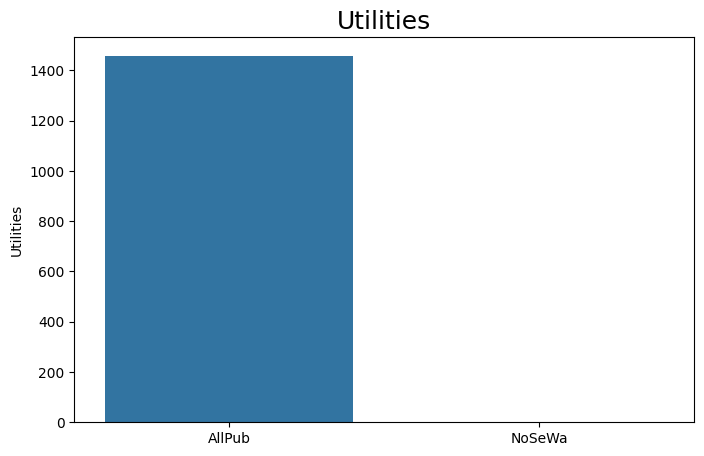

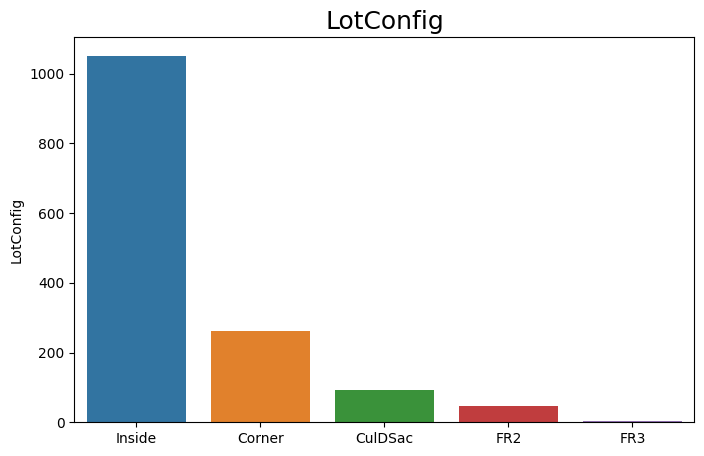

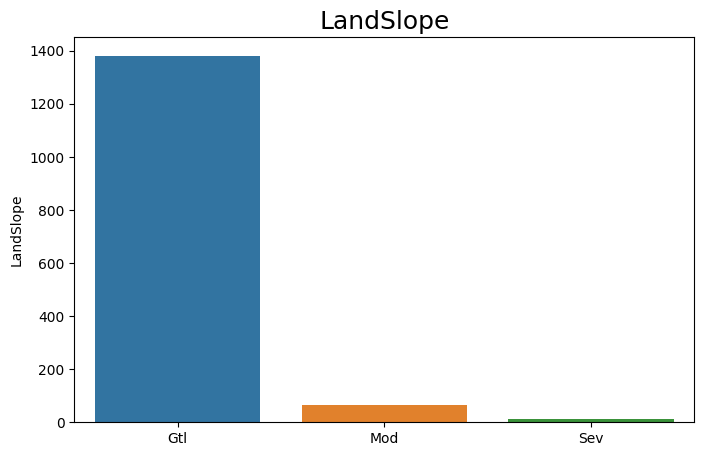

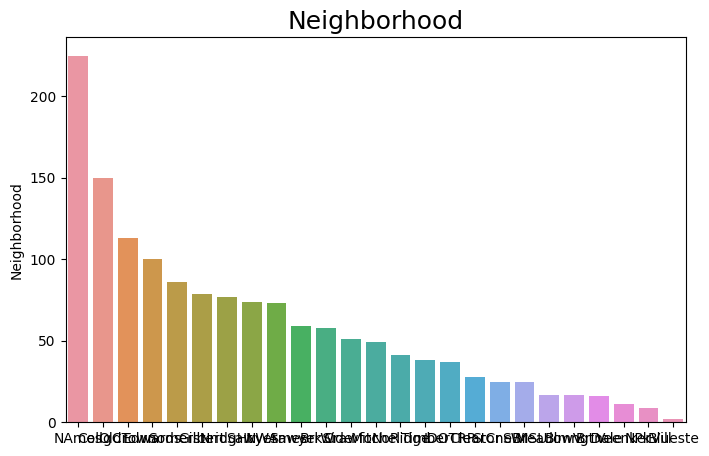

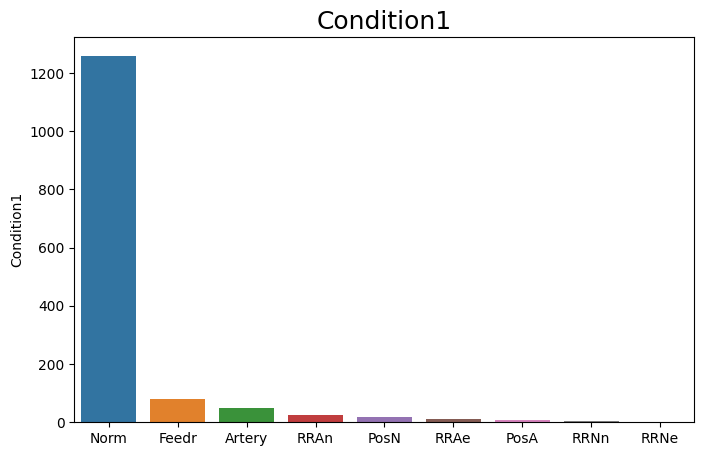

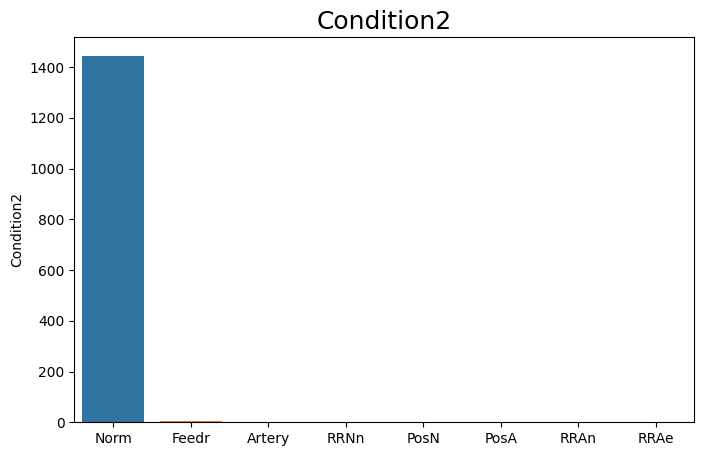

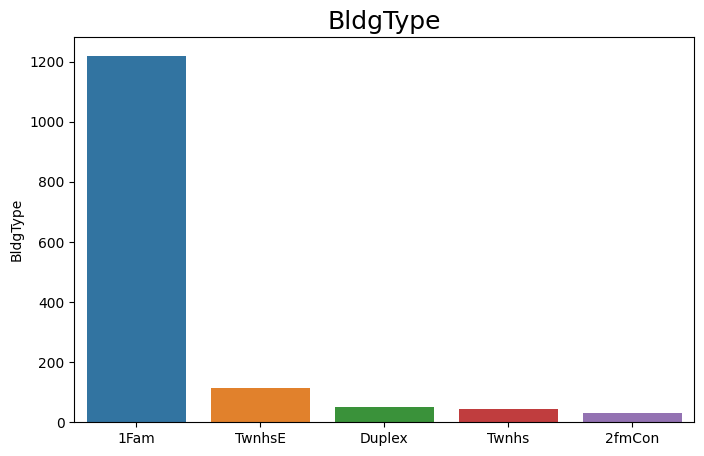

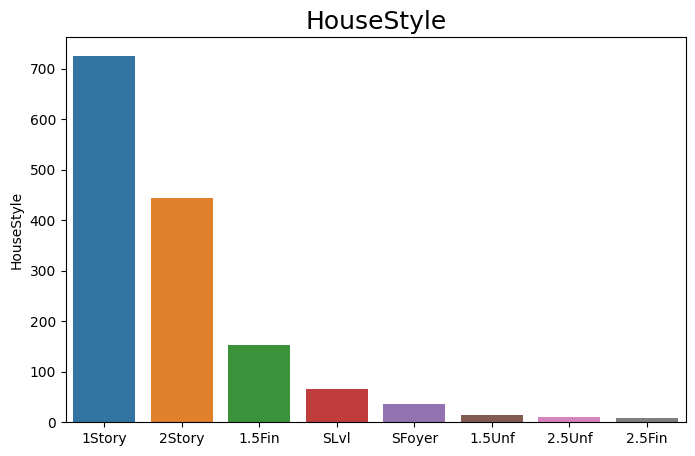

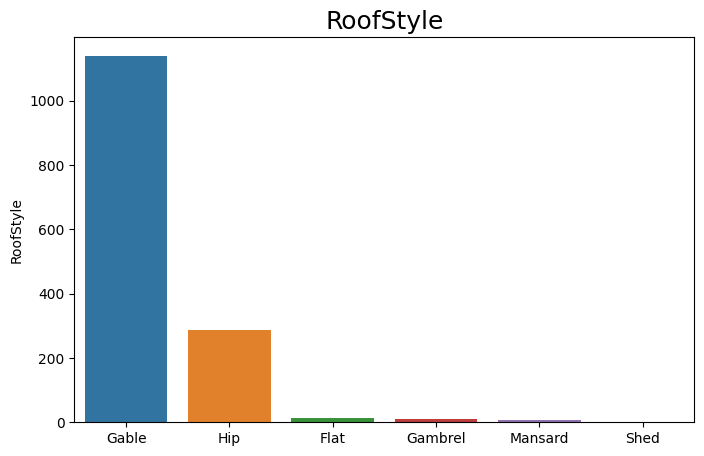

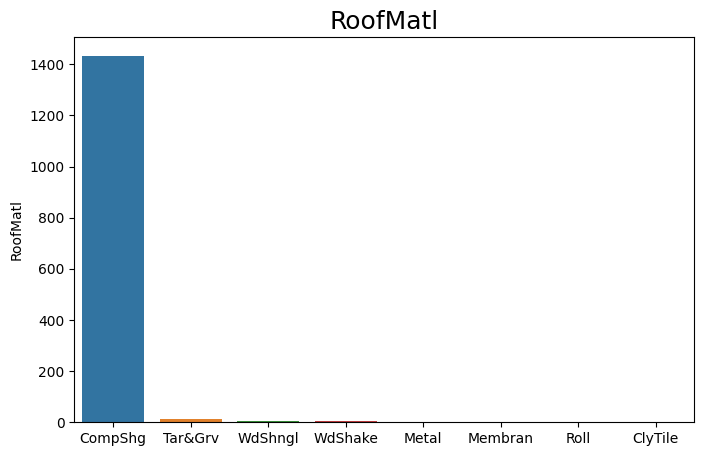

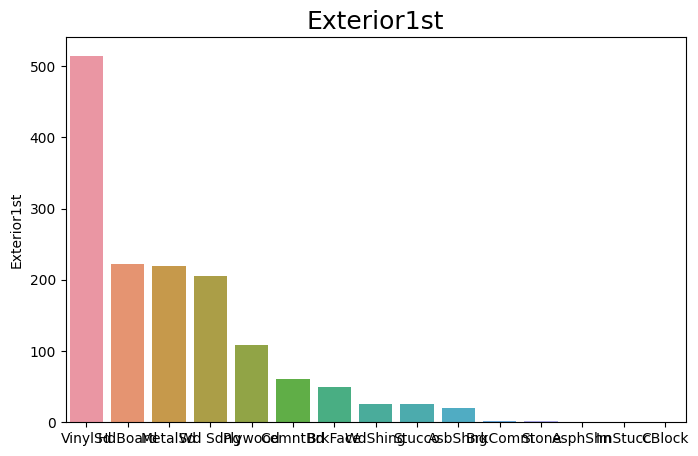

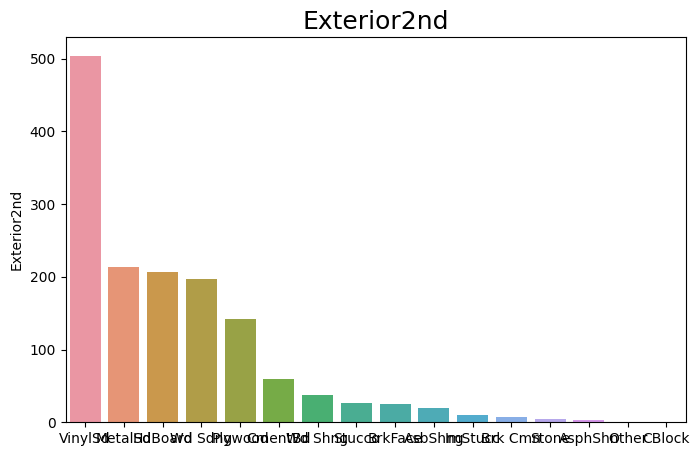

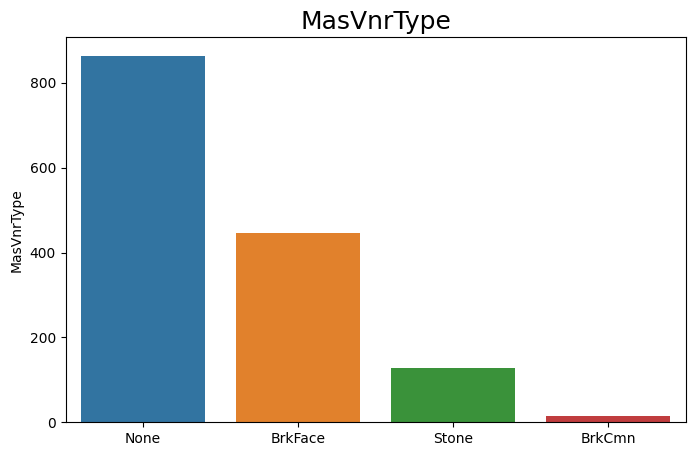

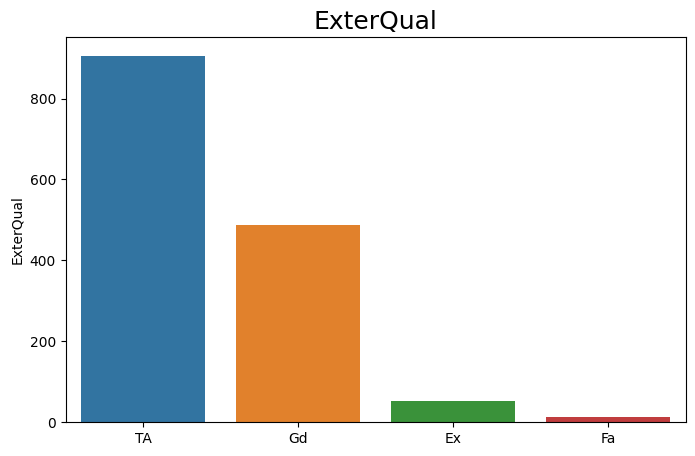

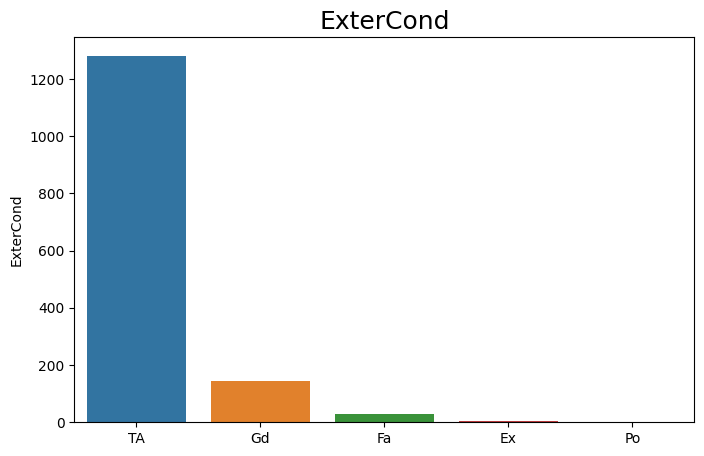

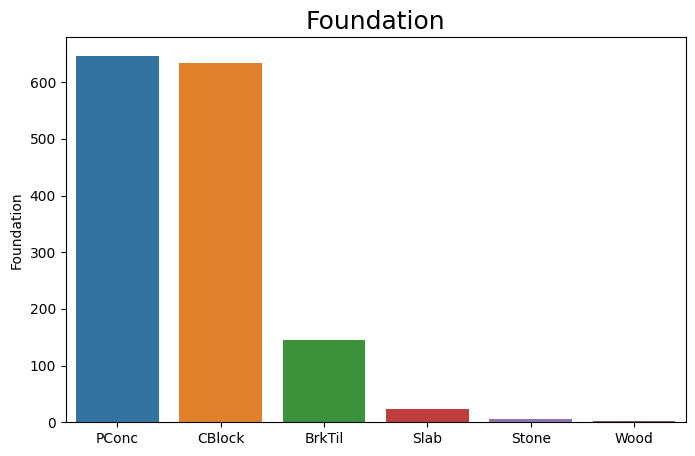

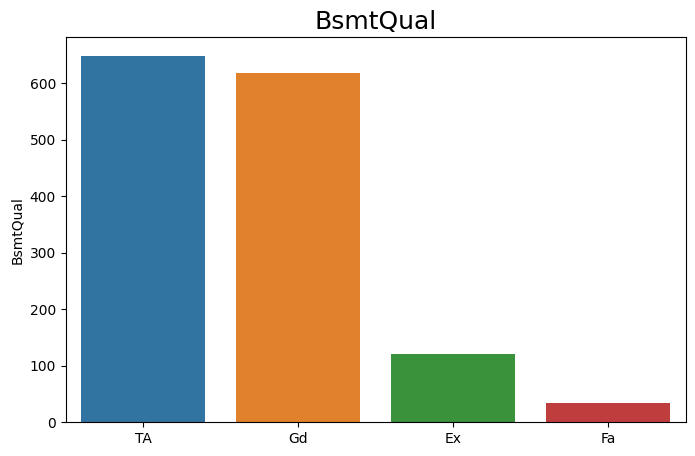

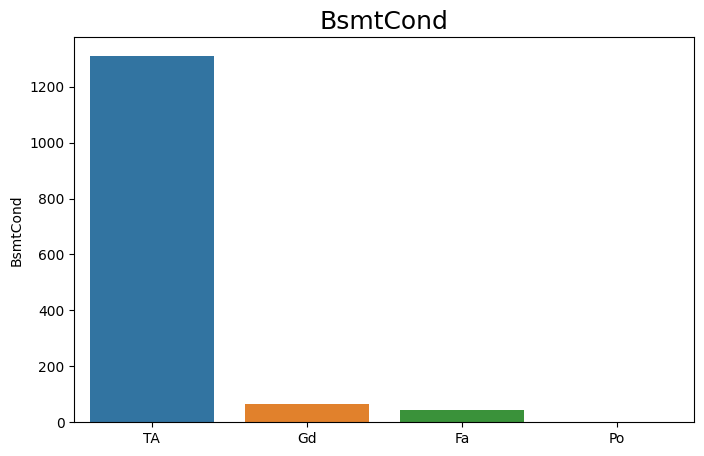

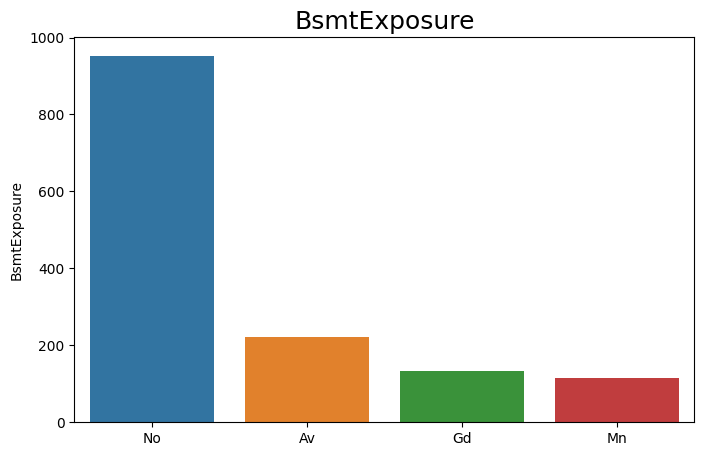

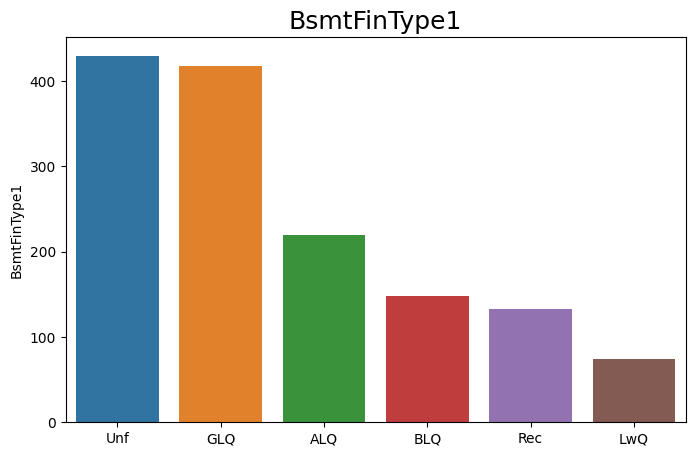

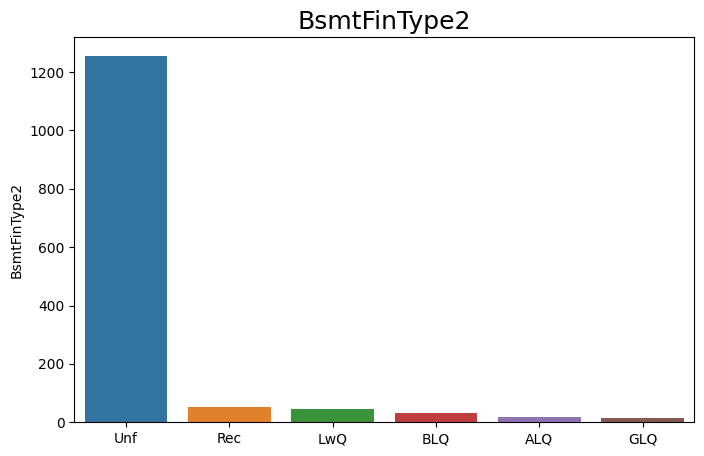

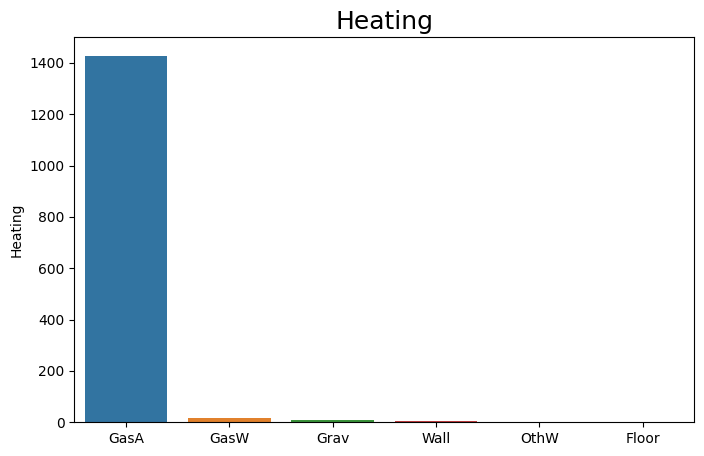

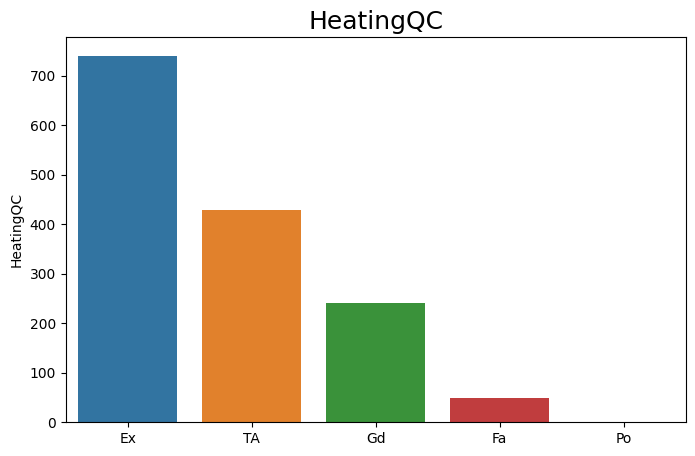

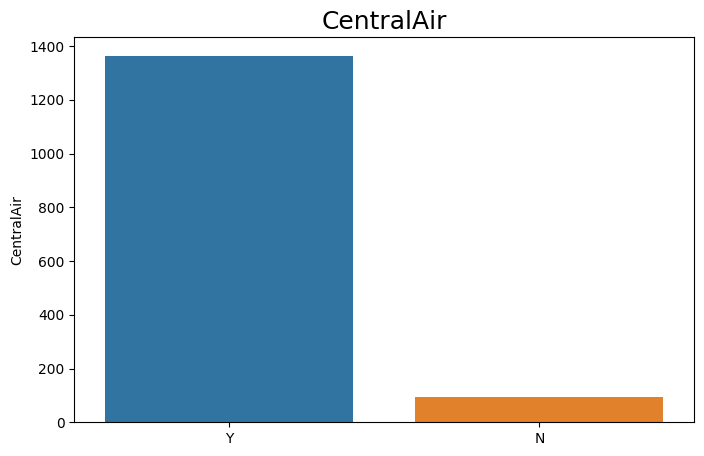

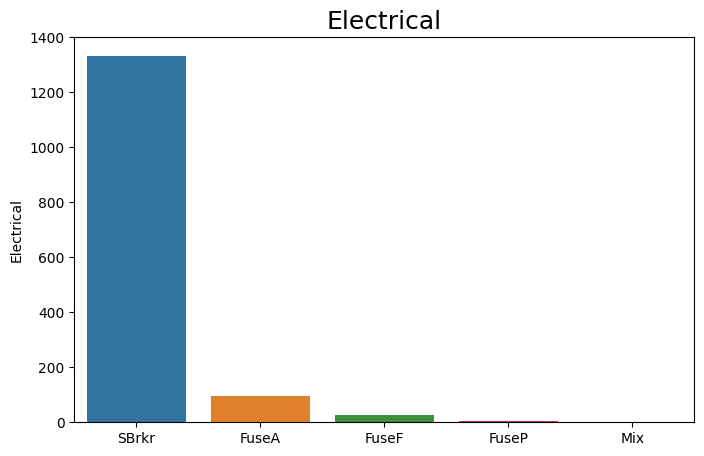

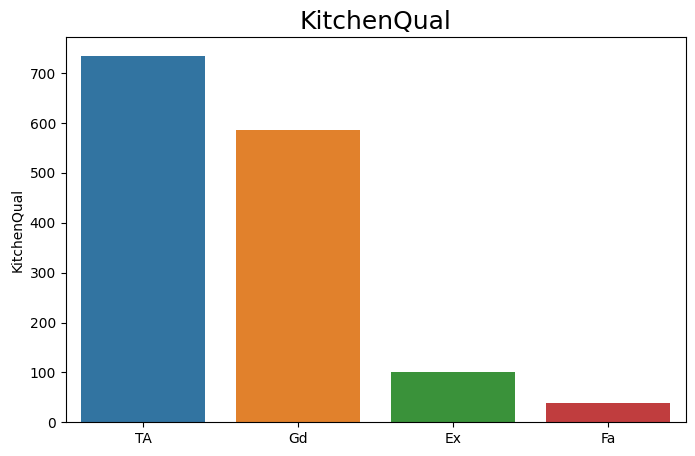

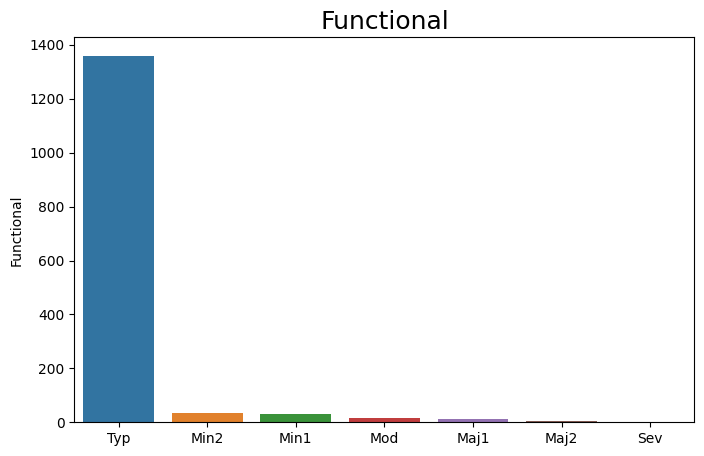

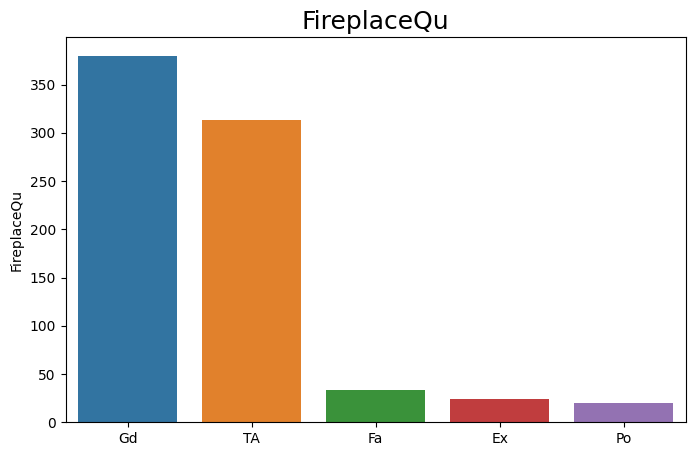

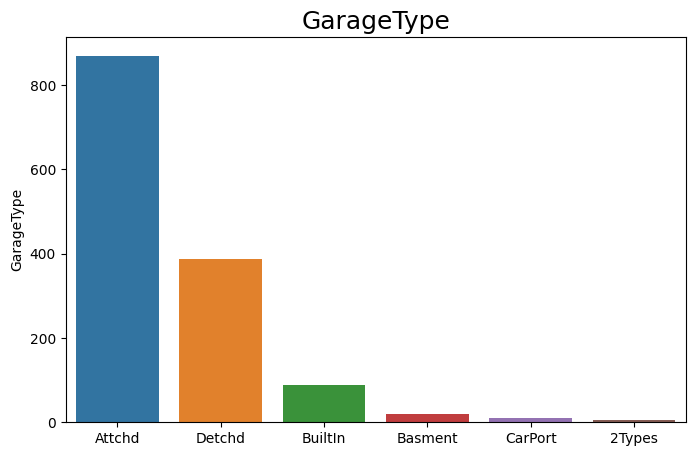

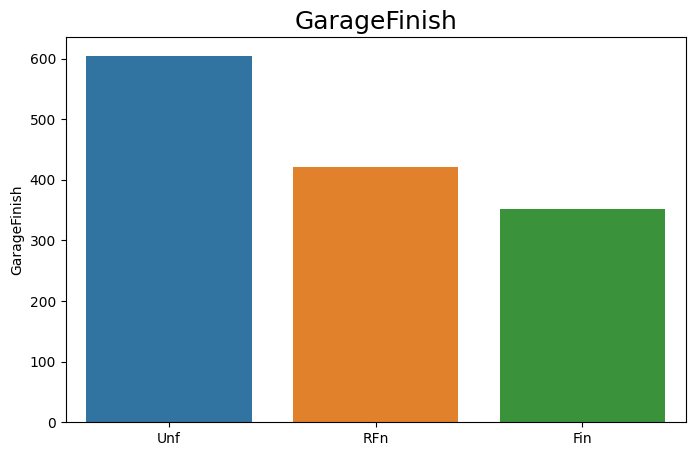

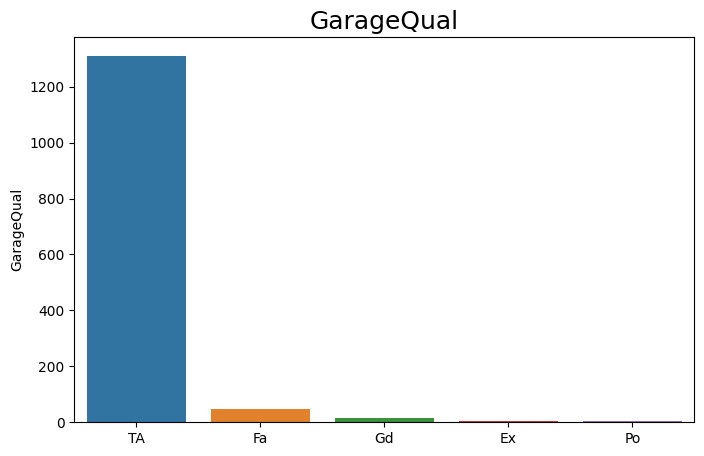

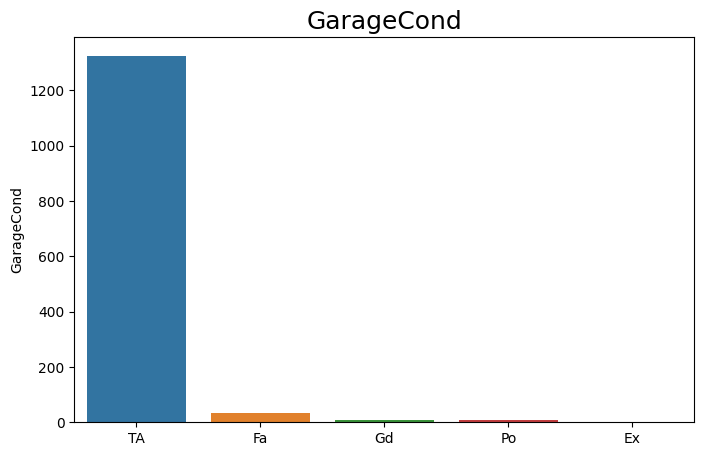

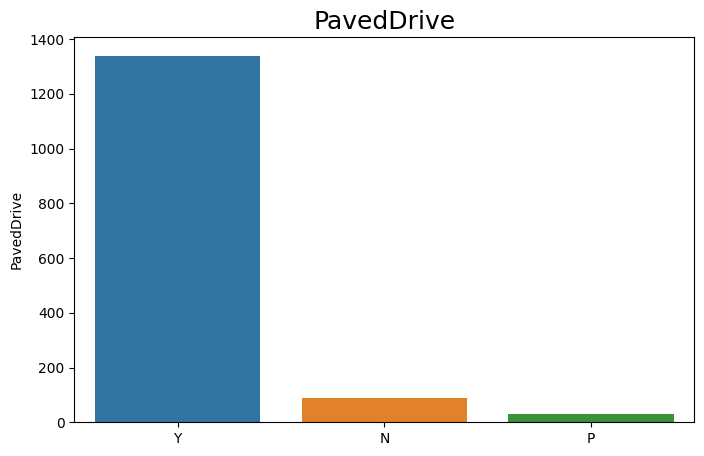

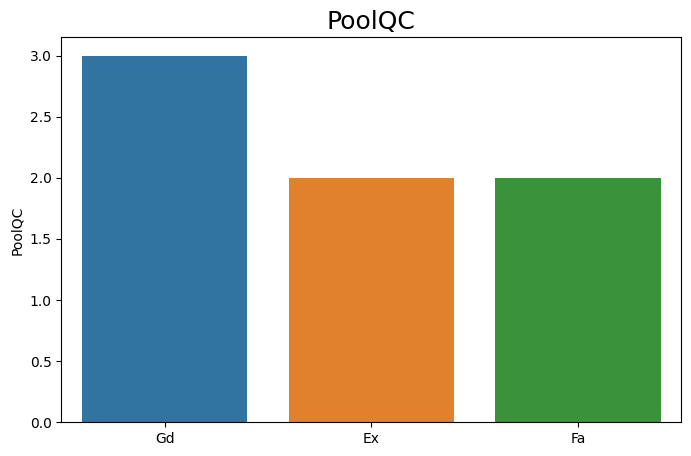

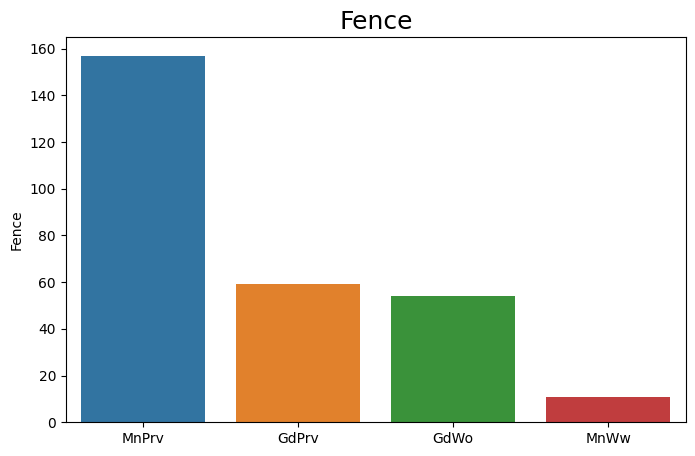

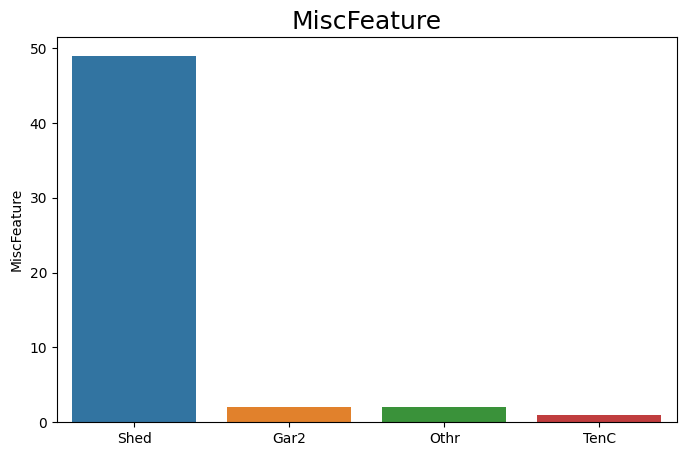

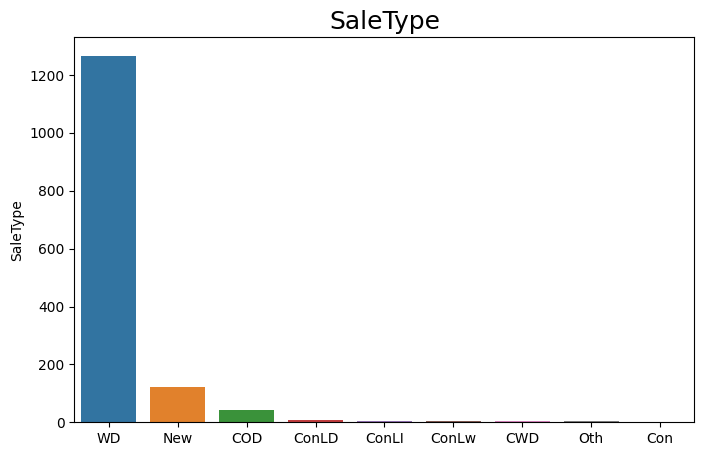

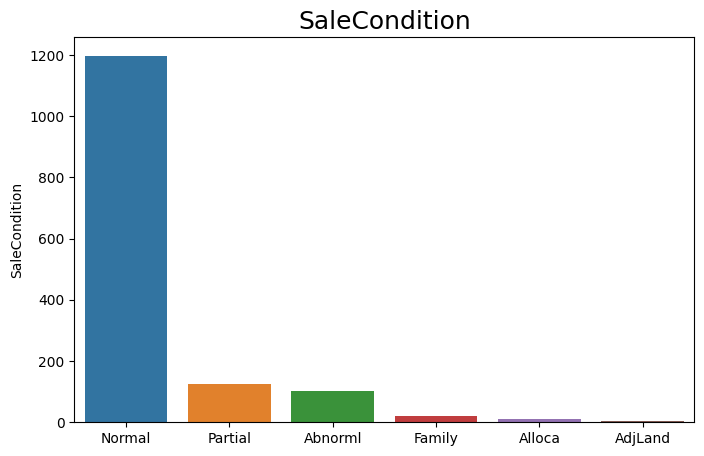

In [666]:
## Check categorical columns using bar plots
for col in categorical_col:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x = source_df[col].value_counts().index, y = source_df[col].value_counts())
    plt.show()

#### Observations:
1. Multiple columns have one value as dominant value and imbalanced data, but no column has single value to drop the column directly

#### EDA Bivariate analysis using correlations

<AxesSubplot: >

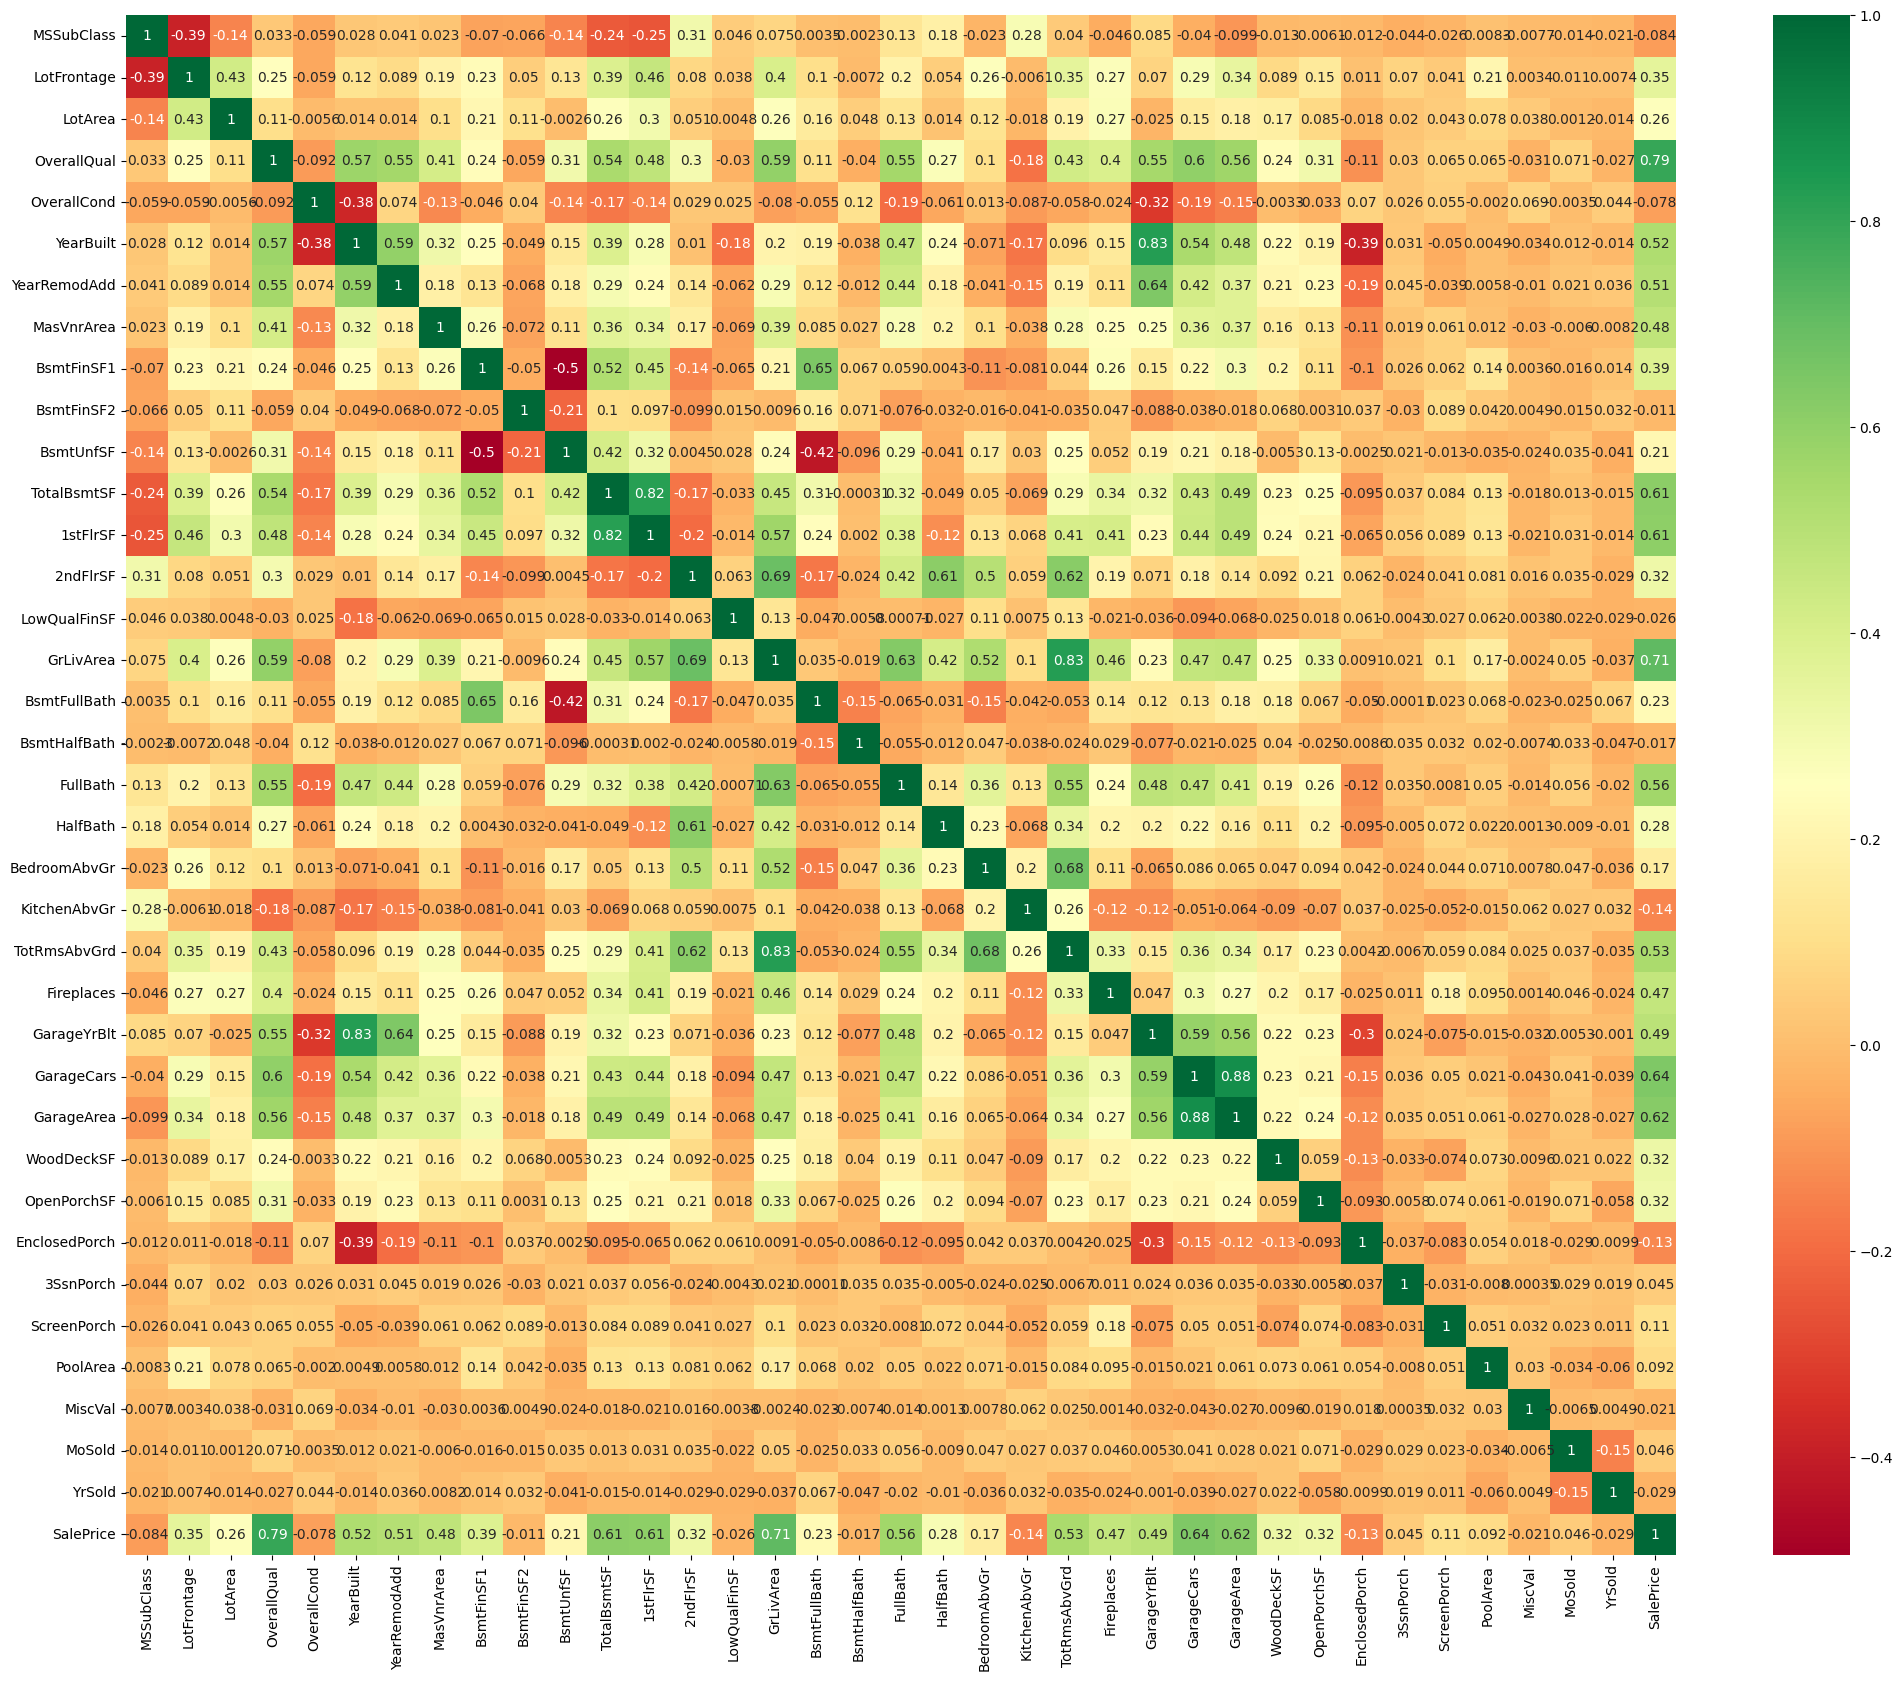

In [667]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(source_df[numerical_col].corr(), annot=True, cmap='RdYlGn')

#### Observations:
- Some columns are highly correlated with each other.
- Target variable SalePrice is highly correlated with OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, TotalRmsabvGrd,FullBath, GarageCars and GarageArea.
- As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression.

## Section 3: Data Preprocessing

### Section 3.1: Data Cleanup

In [668]:
# Delete columns with more than 40% null values, as maximum range is in that category
source_df_clean = source_df.drop(source_df_null[source_df_null["% null"]>40]["columns"].values, axis = 1)
print('Shape of the orginal df:', source_df_clean.shape)
print('Shape after dropping:', source_df_clean.shape)

Shape of the orginal df: (1460, 75)
Shape after dropping: (1460, 75)


In [669]:
# Check the columns and null value list and percentage of null values (non zero) in differend columns
checkNullPerc(source_df_clean)

columns     % null
2    LotFrontage  17.739726
55    GarageType   5.547945
56   GarageYrBlt   5.547945
57  GarageFinish   5.547945
60    GarageQual   5.547945
61    GarageCond   5.547945
33  BsmtFinType2   2.602740
30  BsmtExposure   2.602740
28      BsmtQual   2.534247
29      BsmtCond   2.534247
31  BsmtFinType1   2.534247
24    MasVnrArea   0.547945
23    MasVnrType   0.547945
40    Electrical   0.068493
50  KitchenAbvGr   0.000000

Start handling values which has maximum missing values now and start imputing them

LotFrontage is numerical variable

GarageType,GarageYrBlt,GarageFinish	,GarageQual,GarageCond are categorical variables

### Section 3.2: Data Preparation (Handle Missing data)

In [670]:
#Checking how many unique values are there in each of the categorical column using value counts
value_counts = []
ls = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
for col in ls:
    value_counts.append(len(source_df_clean[col].value_counts()))
data_val = {'cat_col': ls, 'value_counts': value_counts}
pd.DataFrame(data_val)


cat_col  value_counts
0    GarageType             6
1   GarageYrBlt            97
2  GarageFinish             3
3    GarageQual             5
4    GarageCond             5

<AxesSubplot: >

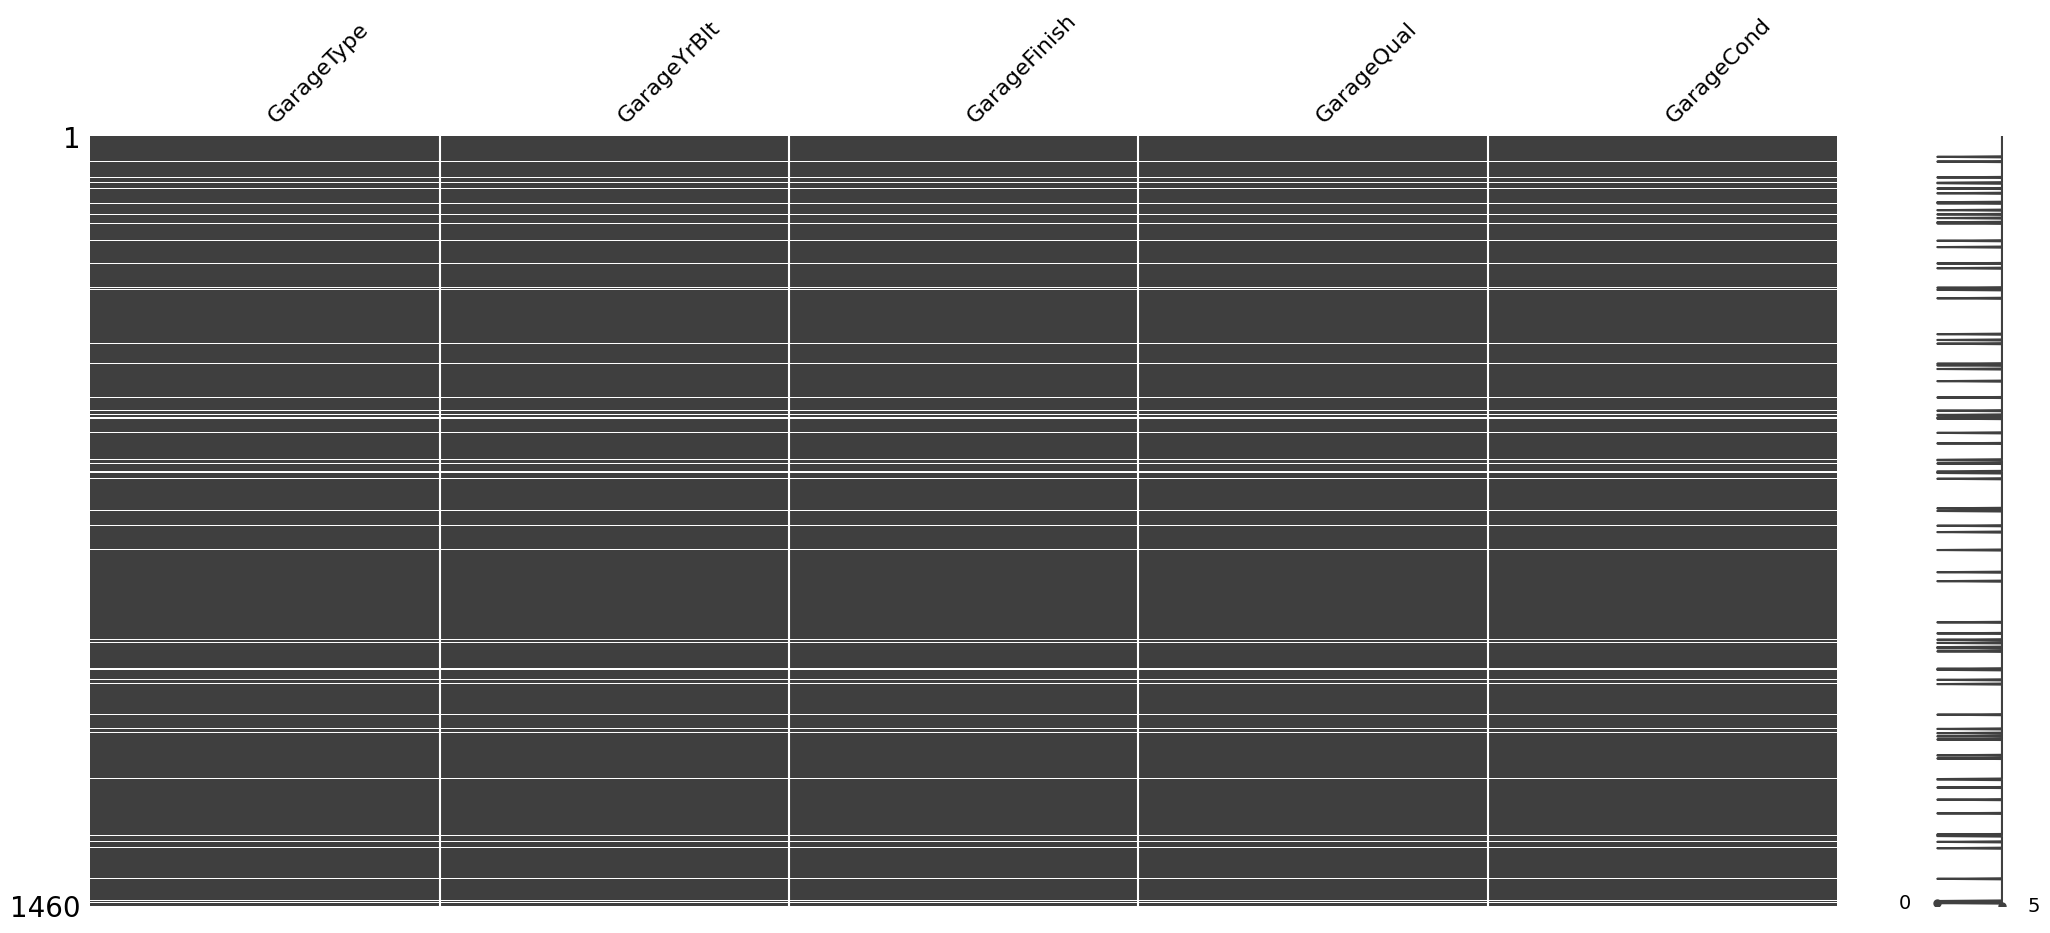

In [671]:
import missingno as msno
msno.matrix(source_df_clean[ls])

GarageYrBlt is year field, rest 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' categorical variables seems to have missing values in same interval, hence we can assign a new category as "No Garage" and Year field can be filled with 0 value 

In [672]:
#'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are nan because there is No Garage'. So replacing NANs with it.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    source_df_clean[col].fillna('No Garage', inplace=True)
source_df_clean['GarageYrBlt'].fillna(0, inplace=True)

In [673]:
source_df_clean[['LotFrontage']].describe()

LotFrontage
count  1201.000000
mean     70.049958
std      24.284752
min      21.000000
25%      59.000000
50%      69.000000
75%      80.000000
max     313.000000

Can see a presence of outlier so imputing the missing values with median value

In [674]:
source_df_clean['LotFrontage']= source_df_clean.LotFrontage.fillna(source_df_clean.LotFrontage.median()) 

In [675]:
# Rechecking the columns and null value list and percentage of null values (non zero) in different columns
checkNullPerc(source_df_clean)

columns    % null
33  BsmtFinType2  2.602740
30  BsmtExposure  2.602740
31  BsmtFinType1  2.534247
28      BsmtQual  2.534247
29      BsmtCond  2.534247
23    MasVnrType  0.547945
24    MasVnrArea  0.547945
40    Electrical  0.068493
48      HalfBath  0.000000
49  BedroomAbvGr  0.000000
54    Fireplaces  0.000000
47      FullBath  0.000000
46  BsmtHalfBath  0.000000
45  BsmtFullBath  0.000000
50  KitchenAbvGr  0.000000

Following same steps with basement fields

In [676]:
#Checking how many unique values are there in each of the categorical column using value counts
value_counts = []
ls = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']
for col in ls:
    value_counts.append(len(source_df_clean[col].value_counts()))
data_val = {'cat_col': ls, 'value_counts': value_counts}
pd.DataFrame(data_val)


cat_col  value_counts
0  BsmtExposure             4
1  BsmtFinType2             6
2      BsmtQual             4
3  BsmtFinType1             6
4      BsmtCond             4

<AxesSubplot: >

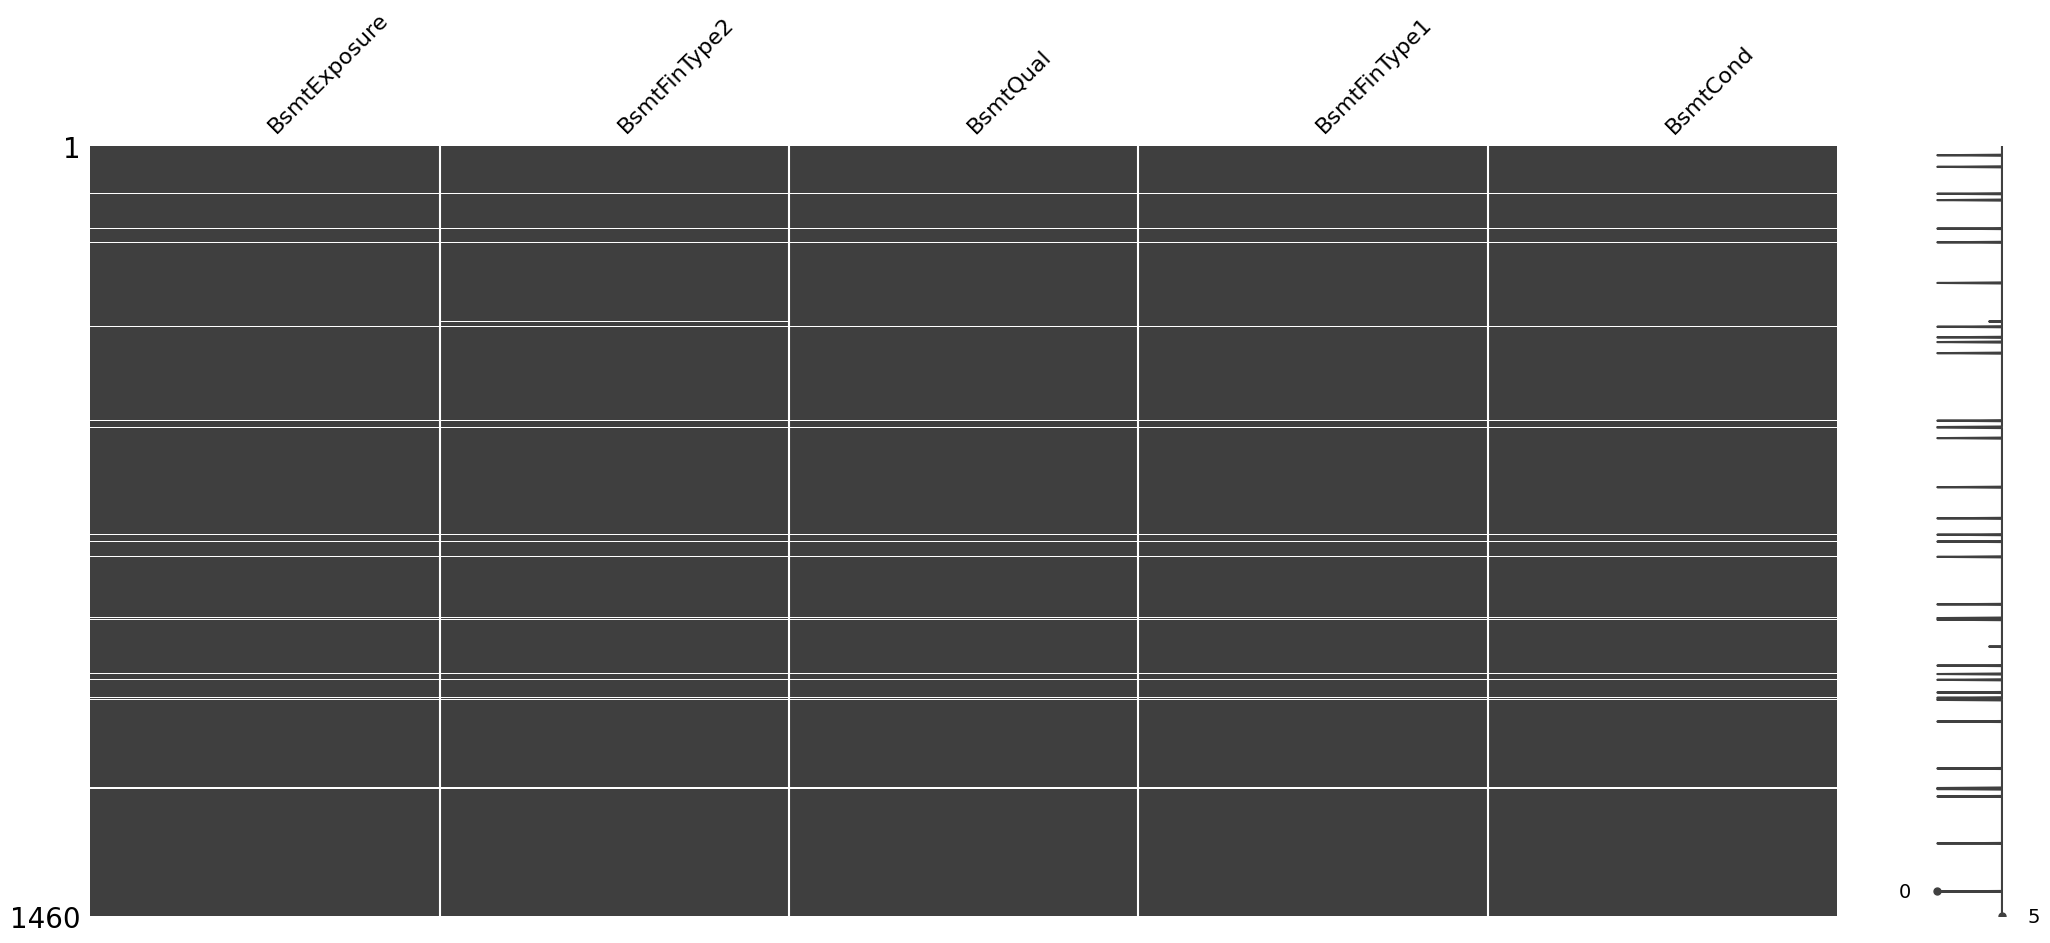

In [677]:
msno.matrix(source_df_clean[ls])

'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' categorical variables seems to have missing values in same interval, hence we can assign a new category as "No Basement" 

In [678]:
for col in ls:
    source_df_clean[col].fillna('No Basement', inplace=True)

In [679]:
# Rechecking the columns and null value list and percentage of null values (non zero) in different columns
checkNullPerc(source_df_clean)

columns    % null
23    MasVnrType  0.547945
24    MasVnrArea  0.547945
40    Electrical  0.068493
49  BedroomAbvGr  0.000000
54    Fireplaces  0.000000
53    Functional  0.000000
52  TotRmsAbvGrd  0.000000
51   KitchenQual  0.000000
50  KitchenAbvGr  0.000000
48      HalfBath  0.000000
39    CentralAir  0.000000
47      FullBath  0.000000
46  BsmtHalfBath  0.000000
45  BsmtFullBath  0.000000
44     GrLivArea  0.000000

In [680]:
source_df_clean["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

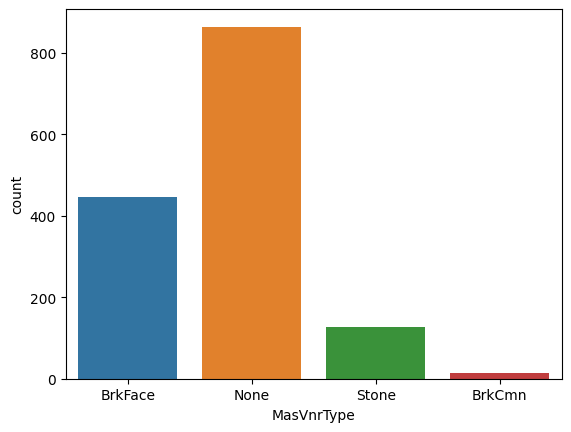

In [681]:
sns.countplot(x = 'MasVnrType', data = source_df_clean)
plt.show()

In [682]:
# Replacing nulls with most repeating values
source_df_clean["MasVnrType"].fillna('None', inplace=True)

In [683]:
# Handling missing values for last numerical cols MasVnrArea
source_df_clean[["MasVnrArea"]].describe()

MasVnrArea
count  1452.000000
mean    103.685262
std     181.066207
min       0.000000
25%       0.000000
50%       0.000000
75%     166.000000
max    1600.000000

In [684]:
# Column seems to have outlier on right side, hence filling null values with median
source_df_clean['MasVnrArea']= source_df_clean.MasVnrArea.fillna(source_df_clean.MasVnrArea.median()) 

In [685]:
# Dropping pending null records
source_df_clean.dropna(inplace=True)

In [686]:
checkNullPerc(source_df_clean)

columns  % null
0     MSSubClass     0.0
56   GarageYrBlt     0.0
54    Fireplaces     0.0
53    Functional     0.0
52  TotRmsAbvGrd     0.0
51   KitchenQual     0.0
50  KitchenAbvGr     0.0
49  BedroomAbvGr     0.0
48      HalfBath     0.0
47      FullBath     0.0
46  BsmtHalfBath     0.0
45  BsmtFullBath     0.0
44     GrLivArea     0.0
43  LowQualFinSF     0.0
42      2ndFlrSF     0.0

In [687]:
from scipy.stats import skew
def calculate_skewness(df, categorical_columns):
    skewness = {}
    for col in categorical_columns:
        if col in df.columns:
            if df[col].dtype == 'object':
                counts = df[col].value_counts()
                skewness[col] = skew(counts)
            else:
                print(f"{col} is not a categorical column.")
        else:
            print(f"{col} is not a column in the DataFrame.")
    return pd.DataFrame(skewness, index=[0]).transpose().rename(columns={0: 'skewness'})
skew_cat = calculate_skewness(source_df_clean,categorical_col)
# Dropping highly skewed categorical columns
r = skew_cat[skew_cat["skewness"]>1].sort_values(by="skewness",ascending=False)
r

Alley is not a column in the DataFrame.
FireplaceQu is not a column in the DataFrame.
PoolQC is not a column in the DataFrame.
Fence is not a column in the DataFrame.
MiscFeature is not a column in the DataFrame.


skewness
Condition1     2.457225
SaleType       2.434417
Condition2     2.267740
RoofMatl       2.267560
Functional     2.038757
BsmtFinType2   2.037265
Exterior2nd    1.933601
Exterior1st    1.854062
Heating        1.788403
GarageCond     1.776692
GarageQual     1.775395
SaleCondition  1.743503
Neighborhood   1.656345
RoofStyle      1.575794
BsmtCond       1.493982
BldgType       1.485986
Electrical     1.484707
GarageType     1.464393
ExterCond      1.458612
MSZoning       1.395033
BsmtExposure   1.388626
LotConfig      1.323041
HouseStyle     1.316099
LandContour    1.153640

Observation: 'Exterior2nd', 'Exterior1st', 'RoofStyle', 'MSZoning', 'GarageType', 'HouseStyle', 'LotConfig', 'BsmtExposure' columns have more one values, hence cannot drop column directly, deleting rest of the fields

In [688]:
skewed_cols = [x for x in r.index if x not in ['Exterior2nd', 'Exterior1st', 'RoofStyle', 'MSZoning', 'GarageType', 'HouseStyle', 'LotConfig', 'BsmtExposure']]
skewed_cols

['Condition1',
 'SaleType',
 'Condition2',
 'RoofMatl',
 'Functional',
 'BsmtFinType2',
 'Heating',
 'GarageCond',
 'GarageQual',
 'SaleCondition',
 'Neighborhood',
 'BsmtCond',
 'BldgType',
 'Electrical',
 'ExterCond',
 'LandContour']

In [689]:
# Dropping highly skewed column 
source_df_clean.drop(skewed_cols,axis=1,inplace=True)

### Section 3.3: Create Derived columns to reduce collinearity between variable

<AxesSubplot: >

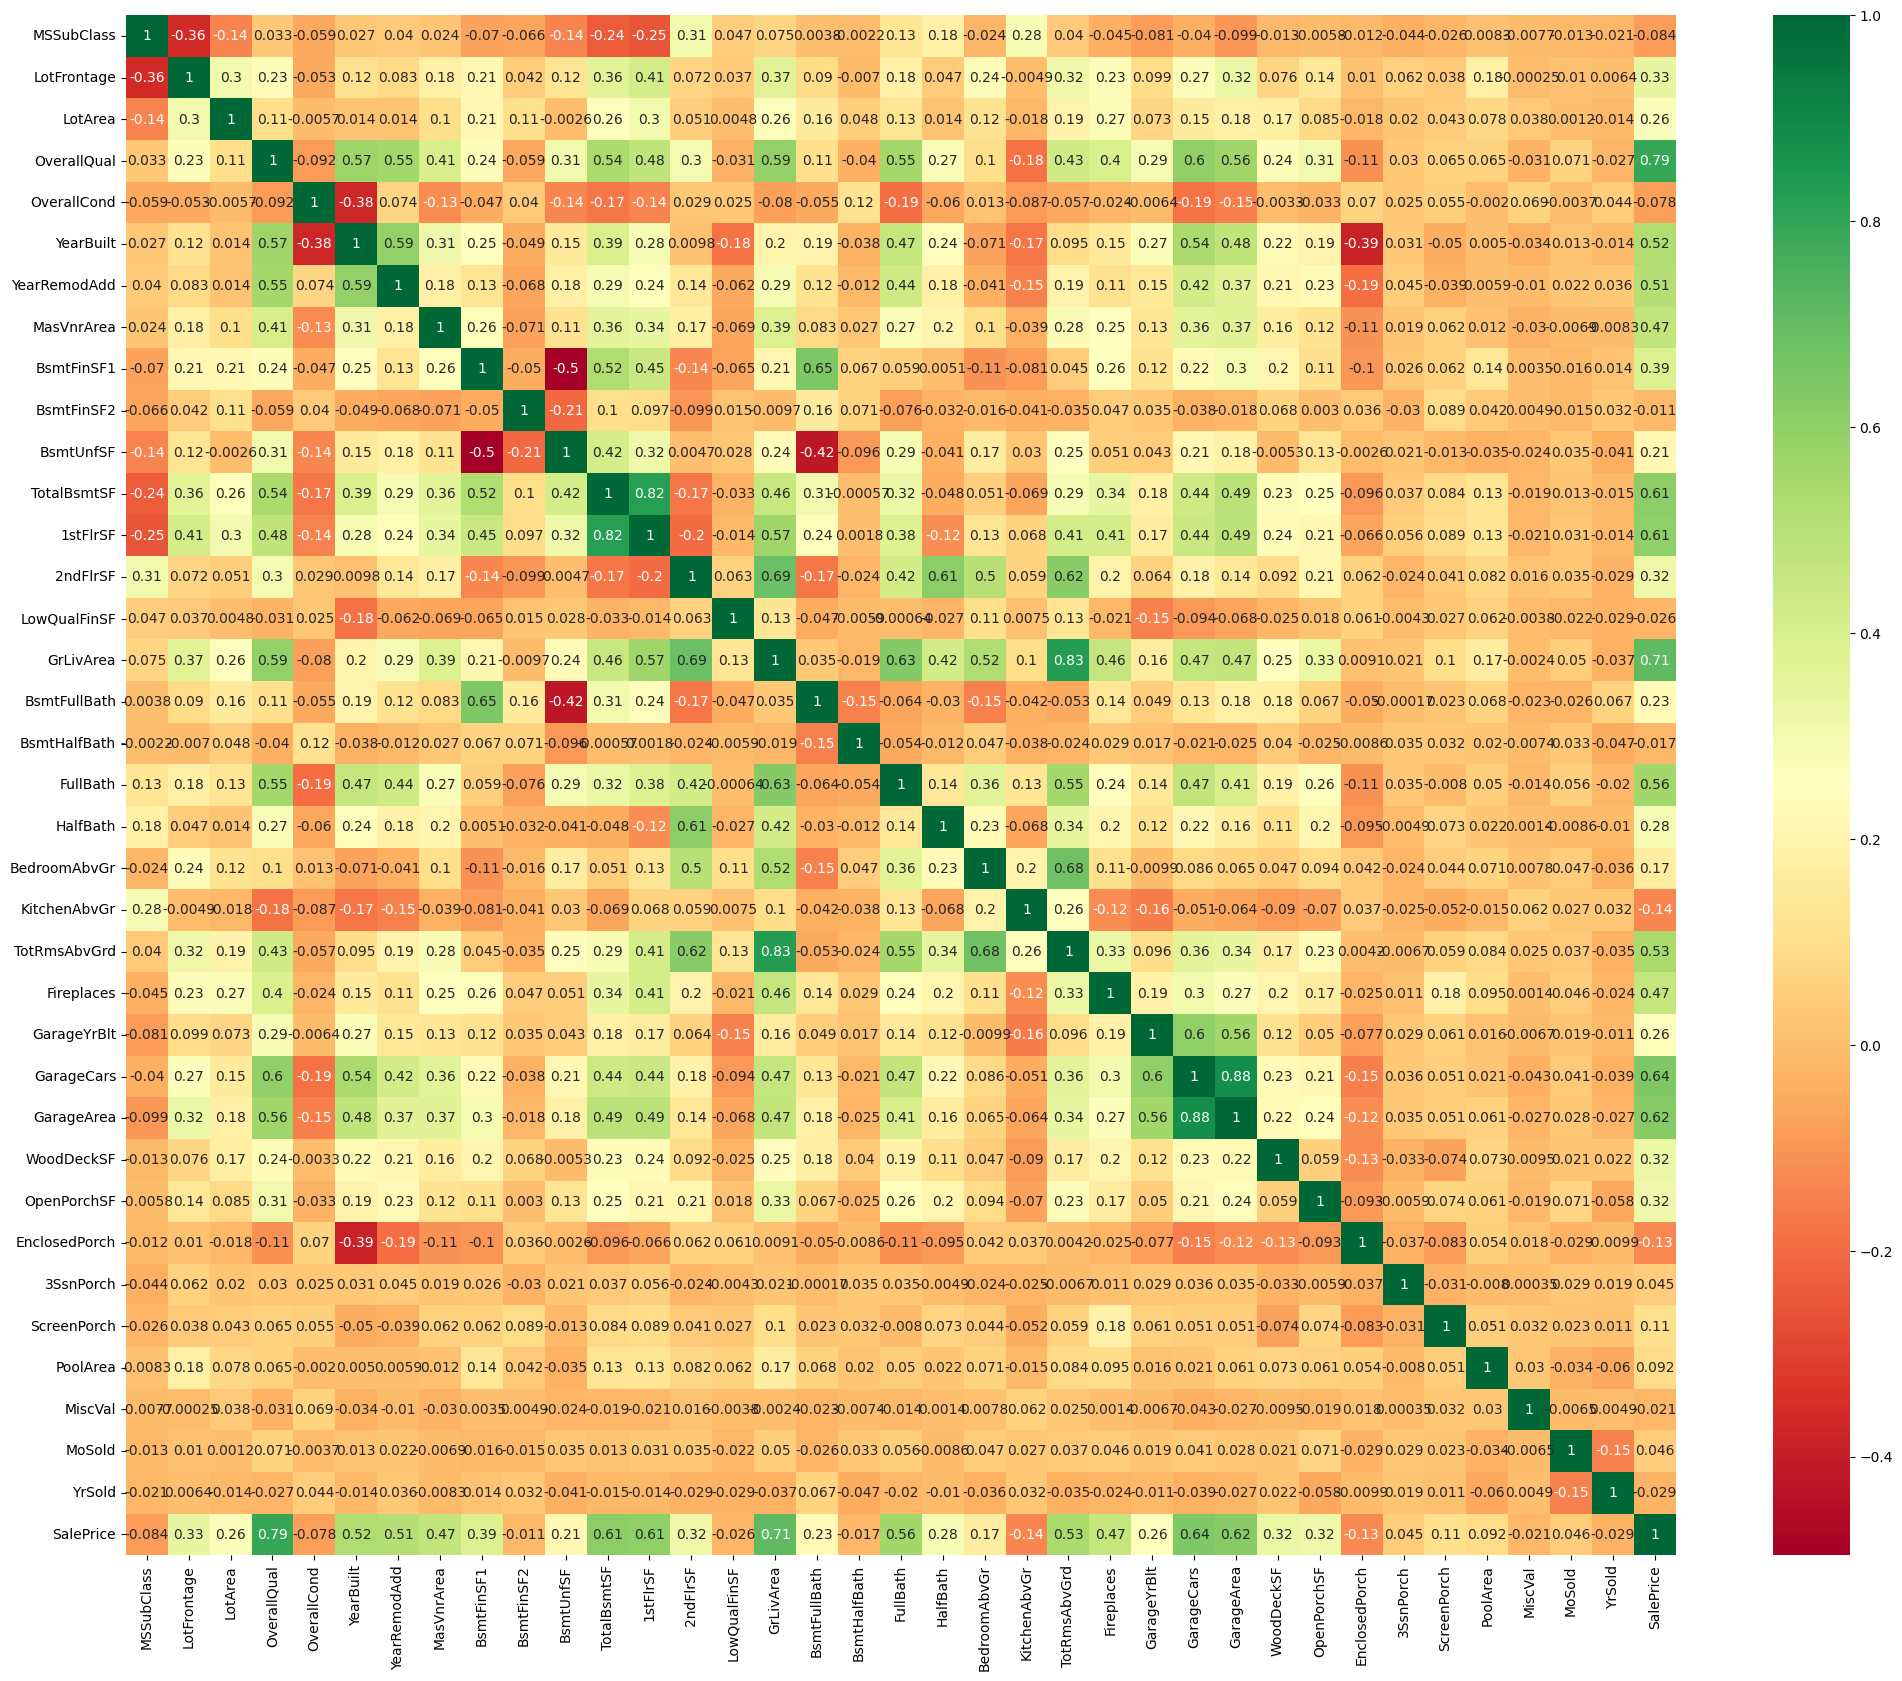

In [690]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(source_df_clean[numerical_col].corr(), annot=True, cmap='RdYlGn')

Below fields are highly correlated, 
- TotRmsAbvGrd, GrLivArea
- 1stFlrSF, TotBsmtSF
- TotRmsAbvGrd, BedroomAbvGr
- GarageArea , GarageCars
- YearRemodAdd, YearBuilt
- Yearblt and GarageYrBlt

We can drop TotRmsAbvGrd,1stFlrSF,GarageArea,GarageYrBlt

In [691]:
#Getting the age of the houses
source_df_clean['CurrentYear'] = datetime.datetime.now().year
source_df_clean["Age"] = source_df_clean['CurrentYear'] - source_df_clean['YearRemodAdd']

In [692]:
source_df_clean.drop(columns=['TotRmsAbvGrd','1stFlrSF','GarageArea','GarageYrBlt','YearRemodAdd','YearBuilt'],inplace=True)

In [693]:
source_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   Utilities      1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   HouseStyle     1459 non-null   object 
 10  OverallQual    1459 non-null   int64  
 11  OverallCond    1459 non-null   int64  
 12  RoofStyle      1459 non-null   object 
 13  Exterior1st    1459 non-null   object 
 14  Exterior2nd    1459 non-null   object 
 15  MasVnrType     1459 non-null   object 
 16  MasVnrArea     1459 non-null   float64
 17  ExterQual      1459 non-null   object 
 18  Foundati

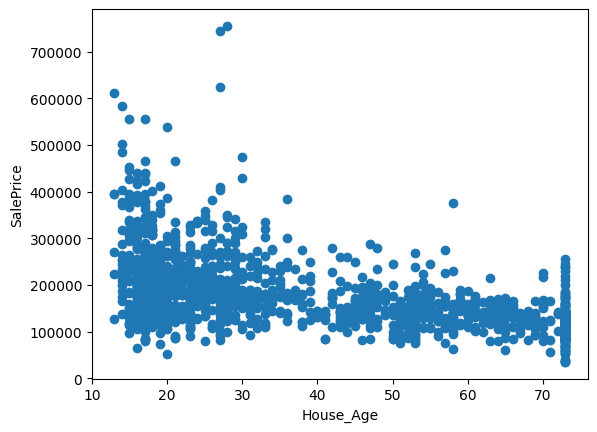

In [694]:
plt.scatter(x=source_df_clean['Age'], y=source_df_clean['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice");

In [695]:
#Regenerating list of numerical and categorical columns
categorical_col = []
numerical_col = []

for col in list(source_df_clean):
    if source_df_clean[col].dtypes == 'object':
        categorical_col.append(col)  
    else:
        numerical_col.append(col)
print('Categorical columns:\n',categorical_col)

print('Numerical columns:\n',numerical_col)

Categorical columns:
 ['MSZoning', 'Street', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'PavedDrive']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'CurrentYear', 'Age']


In [696]:
#Its time to get dummies for all other categorical variables
df_dummy = pd.get_dummies(source_df_clean[categorical_col], drop_first=True)

In [697]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
df_concat = pd.concat([source_df_clean, df_dummy], axis=1)
df_concat.shape

(1459, 155)

In [698]:
#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(categorical_col, axis = 1)
df_final.shape

(1459, 133)

In [699]:
df_final.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass                  1.000000    -0.356810 -0.139766     0.032936   
LotFrontage                -0.356810     1.000000  0.304533     0.234942   
LotArea                    -0.139766     0.304533  1.000000     0.105786   
OverallQual                 0.032936     0.234942  0.105786     1.000000   
OverallCond                -0.059134    -0.053235 -0.005665    -0.092243   
MasVnrArea                  0.023792     0.178545  0.103302     0.407075   
BsmtFinSF1                 -0.069501     0.214533  0.214121     0.239265   
BsmtFinSF2                 -0.065549     0.042493  0.111158    -0.059291   
BsmtUnfSF                  -0.140627     0.124147 -0.002641     0.308018   
TotalBsmtSF                -0.238160     0.363919  0.260962     0.537523   
2ndFlrSF                    0.307713     0.072334  0.051030     0.295969   
LowQualFinSF                0.046524     0.037481  0.004773    -0.030502   
GrLivArea                   0.074949     0.368039  0.263109     0.593021   
BsmtFullBath                0.003799     0.090444  0.158147     0.110700   
BsmtHalfBath               -0.002243    -0.006956  0.048034    -0.040291   
FullBath                    0.131354     0.180497  0.126100     0.551267   
HalfBath                    0.177004     0.047126  0.014333     0.274328   
BedroomAbvGr               -0.023502     0.236828  0.119700     0.101789   
KitchenAbvGr                0.281833    -0.004884 -0.017796    -0.184040   
Fireplaces                 -0.045232     0.233388  0.271398     0.396455   
GarageCars                 -0.040232     0.269520  0.154893     0.600991   
WoodDeckSF                 -0.012598     0.075538  0.171701     0.239000   
OpenPorchSF                -0.005838     0.137107  0.084751     0.308554   
EnclosedPorch              -0.011904     0.010323 -0.018360    -0.114162   
3SsnPorch                  -0.043786     0.061957  0.020417     0.030314   
ScreenPorch                -0.025932     0.037683  0.043147     0.064755   
PoolArea                    0.008309     0.180827  0.077669     0.065143   
MiscVal                    -0.007651    -0.000247  0.038063    -0.031461   
MoSold                     -0.013404     0.010499  0.001179     0.070570   
YrSold                     -0.021461     0.006367 -0.014254    -0.027277   
SalePrice                  -0.084230     0.334793  0.263837     0.791069   
CurrentYear                      NaN          NaN       NaN          NaN   
Age                        -0.040199    -0.083277 -0.013852    -0.551605   
MSZoning_FV                 0.171437    -0.090188 -0.083908     0.171777   
MSZoning_RH                 0.058333    -0.043258 -0.033098    -0.064737   
MSZoning_RL                -0.343614     0.323072  0.204112     0.127294   
MSZoning_RM                 0.277952    -0.305293 -0.173742    -0.195798   
Street_Pave                -0.024995    -0.037356 -0.197128     0.058871   
LotShape_IR2               -0.019330     0.030064  0.225154     0.077678   
LotShape_IR3               -0.031193     0.180040  0.256523     0.042053   
LotShape_Reg                0.121782    -0.159425 -0.216114    -0.199003   
Utilities_NoSeWa           -0.022836    -0.001024  0.010122    -0.001895   
LotConfig_CulDSac          -0.044345    -0.062099  0.179430     0.075903   
LotConfig_FR2               0.015288    -0.039033 -0.002177     0.012063   
LotConfig_FR3               0.044154     0.002115 -0.009514     0.043606   
LotConfig_Inside            0.067611    -0.144789 -0.132758    -0.044368   
LandSlope_Mod              -0.018638     0.069224  0.092639    -0.049264   
LandSlope_Sev              -0.017151     0.020463  0.540377    -0.043787   
HouseStyle_1.5Unf          -0.006041    -0.063537 -0.033516    -0.042717   
HouseStyle_1Story          -0.465922     0.066122  0.012667    -0.110691   
HouseStyle_2.5Fin           0.055946     0.029962  0.014512     0.014764   
HouseStyle_2.5Unf           0.080423    -0.029308 -0.011912     0.028075  

In [700]:
df_final.drop(columns=["PavedDrive_P","GarageType_CarPort","GarageType_Basment"], inplace=True)

In [701]:
df_final.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
Id                                                                           
1           60         65.0     8450            7            5       196.0   
2           20         80.0     9600            6            8         0.0   
3           60         68.0    11250            7            5       162.0   
4           70         60.0     9550            7            5         0.0   
5           60         84.0    14260            8            5       350.0   

    BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  \
Id                                                                           
1          706           0        150          856       854             0   
2          978           0        284         1262         0             0   
3          486           0        434          920       866             0   
4          216           0        540          756       756             0   
5          655           0        490         1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1         2         0             3   
3        1786             1             0         2         1             3   
4        1717             1             0         1         0             3   
5        2198             1             0         2         1             4   

    KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
Id                                                                  
1              1           0           2           0           61   
2              1           1           2         298            0   
3              1           1           2           0           42   
4              1           1           3           0           35   
5              1           1           3         192           84   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
Id                                                                             
1               0          0            0         0        0       2    2008   
2               0          0            0         0        0       5    2007   
3               0          0            0         0        0       9    2008   
4             272          0            0         0        0       2    2006   
5               0          0            0         0        0      12    2008   

    SalePrice  CurrentYear  Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
Id                                                                       
1      208500         2023   20            0            0            1   
2      181500         2023   47            0            0            1   
3      223500         2023   21            0            0            1   
4      140000         2023   53            0            0            1   
5      250000         2023   23            0            0            1   

    MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
Id                                                                       
1             0            1             0             0             1   
2             0            1             0             0             1   
3             0            1             0             0             0   
4             0            1             0             0             0   
5             0            1             0             0             0   

    Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
Id                                                                      
1                  0                  0              0              0   
2                  0                  0              1

### Section 3.4: Fixing skewed nature of target variable

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

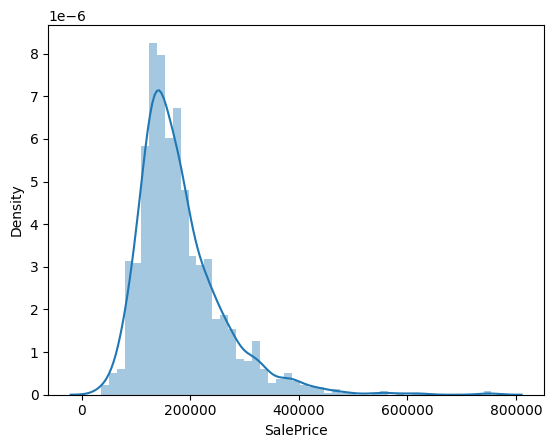

In [702]:
sns.distplot(df_final['SalePrice']) #it's skewed

In [703]:
#skewness and kurtosis
print("Skewness: %f" % df_final['SalePrice'].skew())

Skewness: 1.881943


In [704]:
df_final['SalePrice']=np.log(df_final.SalePrice) #tranforming to form normal disribution

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

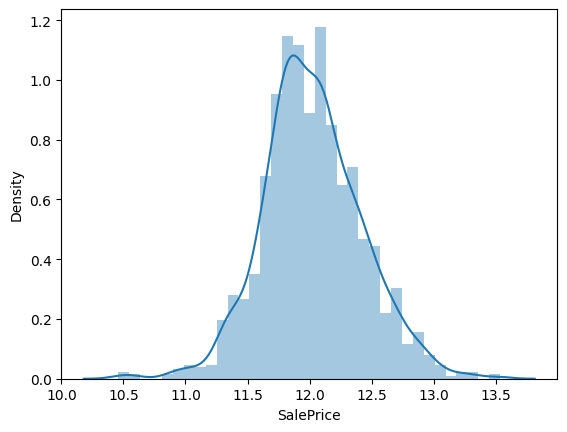

In [705]:
sns.distplot(df_final['SalePrice']) # Normally distributed now

Now the target variable is normally distributed

### Section 3.5: Outlier treatment

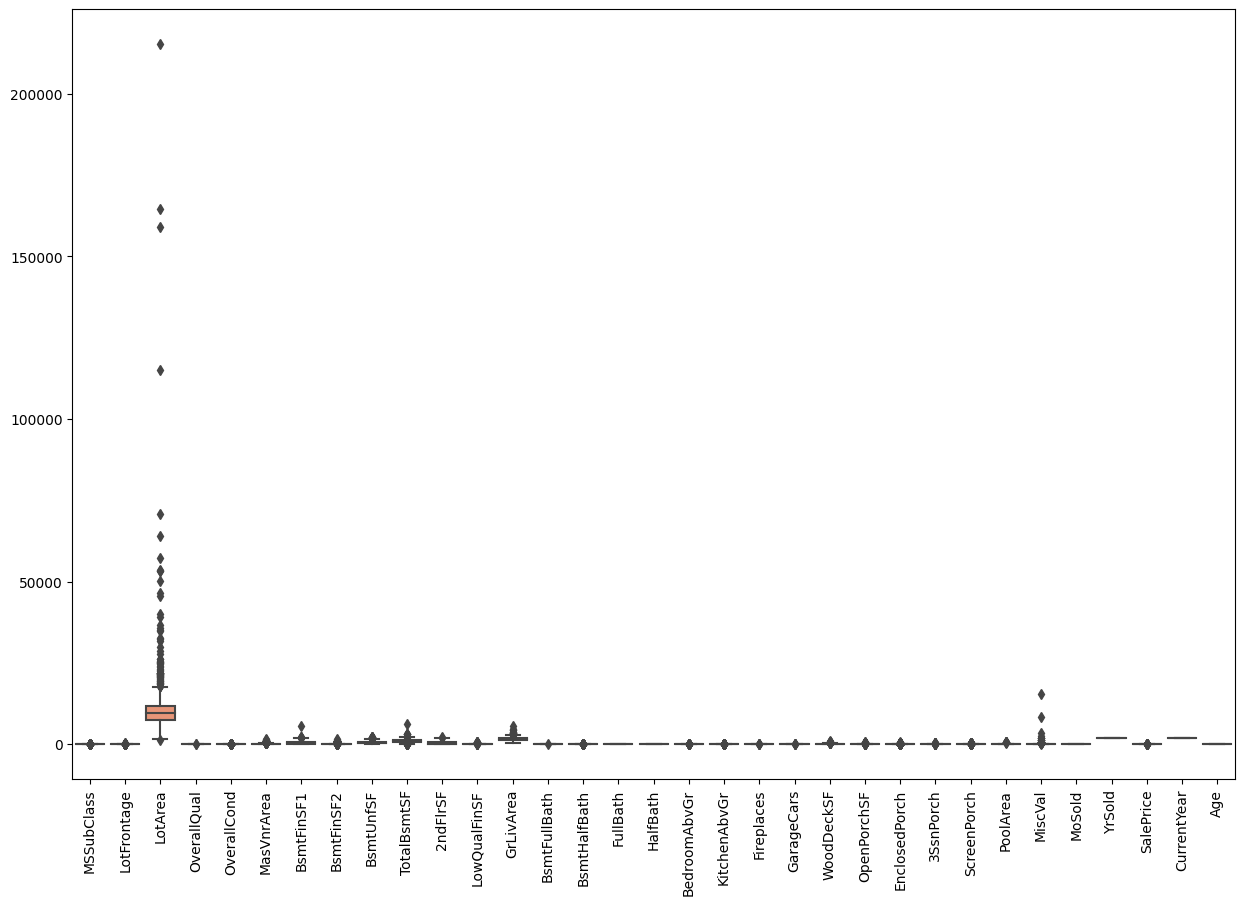

In [706]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
sns.boxplot(data=df_final[numerical_col]);

In [707]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_final.columns:
    df_final[col][df_final[col] <= df_final[col].quantile(0.05)] = df_final[col].quantile(0.05)
    df_final[col][df_final[col] >= df_final[col].quantile(0.95)] = df_final[col].quantile(0.95)

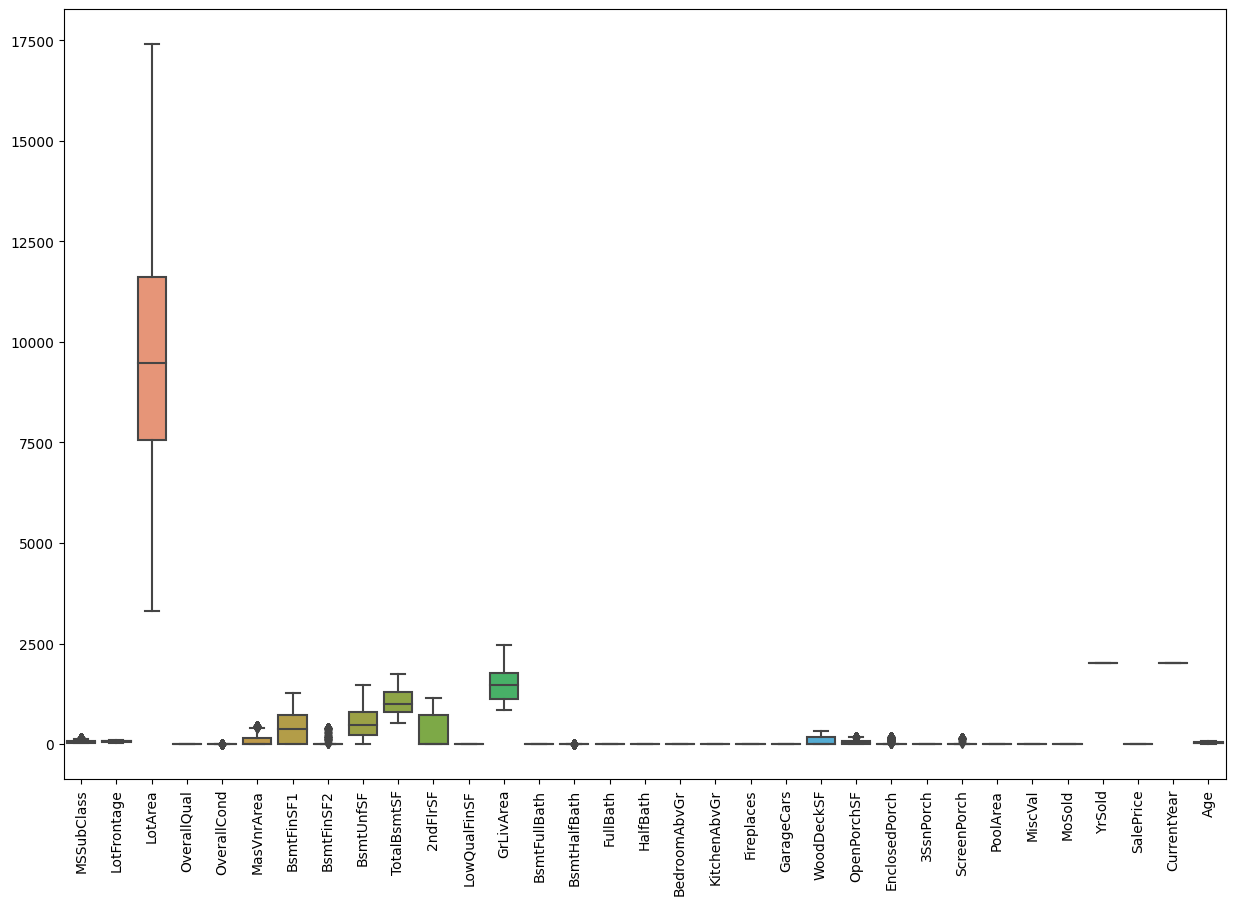

In [708]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
sns.boxplot(data=df_final[numerical_col]);

Observation: major outlier from LotArea has been removed

## Section 4: Modelling Preparation 

### Section 4.1: Train Test Split

In [709]:
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [710]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 129)
X_test Shape: (438, 129)
y_train Shape: (1021,)
y_test Shape: (438,)


### Section 4.2: Scaling

In [711]:
scaler = StandardScaler()

In [712]:
#Scaling the numerical columns
numerical_col.remove('SalePrice')
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
Id                                                                              
985     0.850574     0.347876  0.115225    -0.869128    -0.572338   -0.646402   
1417    2.616712    -0.560904  0.470263    -1.675838     0.408127   -0.646402   
391    -0.158649    -1.166757 -0.387381    -0.869128     2.369057   -0.646402   
878     0.093657     0.287291 -0.262022     1.550999    -0.572338    0.871949   
568    -0.915565     0.044949  0.128666     0.744290    -0.572338    0.534537   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
985    -1.016941   -0.337805  -1.325117    -1.519296  0.240174           0.0   
1417   -1.016941   -0.337805   0.522775    -0.793628  1.721162           0.0   
391    -0.441538    3.385512  -0.780501    -0.556445  0.177256           0.0   
878     1.776509   -0.337805  -0.630671     1.140545  1.038746           0.0   
568    -1.012166   -0.337805   2.166138     1.295844 -0.805229           0.0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                              
985    0.511817     -0.849561     -0.245415  0.907312 -0.763509      1.714442   
1417   1.750333     -0.849561     -0.245415  0.907312 -0.763509      1.714442   
391   -0.305692      1.177079     -0.245415 -1.102157 -0.763509      1.714442   
878    1.603315      1.177079     -0.245415  0.907312  1.309743      1.714442   
568    0.068536     -0.849561     -0.245415  0.907312 -0.763509      0.193638   

      KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
Id                                                                    
985            0.0   -0.974794    0.311151   -0.795354    -0.816046   
1417           0.0   -0.974794    0.311151   -0.795354    -0.816046   
391            0.0   -0.974794   -1.034974   -0.795354     1.551008   
878            0.0    0.595024    1.657276    0.881357    -0.816046   
568            0.0   -0.974794    0.311151   -0.795354    -0.816046   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  \
Id                                                                         
985       -0.390473        0.0    -0.287561       0.0      0.0  0.671322   
1417       1.819156        0.0    -0.287561       0.0      0.0 -0.884682   
391        1.780390        0.0    -0.287561       0.0      0.0 -0.884682   
878       -0.390473        0.0    -0.287561       0.0      0.0 -0.106680   
568       -0.390473        0.0    -0.287561       0.0      0.0 -1.273683   

        YrSold  CurrentYear       Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
Id                                                                             
985   0.890540          0.0  0.350068            0            0            1   
1417  1.638888          0.0  1.641946            0            0            0   
391   0.142193          0.0  1.641946            0            0            1   
878   0.890540          0.0 -0.989657            0            0            1   
568   1.638888          0.0 -0.941810            0            0            1   

      MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
Id                                                                         
985             0            1             0             0             1   
1417            1            1             0             0             1   
391             0            1             0             0             1   
878             0            1             0             0             1   
568             0            1             0             0             0   

      Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
Id                                                                        
985                  0            

In [713]:
X_test[numerical_col] = scaler.transform(X_test[numerical_col])
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
Id                                                                             
790    0.093657    -0.015636  0.723027    -0.062419     2.369057    0.457214   
426    0.093657    -0.560904 -1.856333     0.744290     2.369057   -0.646402   
205   -0.158649    -1.166757 -1.820683    -0.869128     1.388592   -0.646402   
119    0.093657     1.256656  0.772995     0.744290    -0.572338   -0.646402   
245    0.093657    -0.015636 -0.248580     0.744290    -0.572338   -0.646402   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  LowQualFinSF  \
Id                                                                            
790    0.339196   -0.337805  -0.697262    -0.638330  1.883296           0.0   
426   -1.016941   -0.337805   0.223117    -1.149403  0.845153           0.0   
205   -0.272021   -0.337805  -0.354796    -0.954574  0.559603           0.0   
119    2.024816   -0.337805  -0.842335     1.736327  1.956135           0.0   
245    0.642416   -0.337805  -0.723423    -0.310791  1.343655           0.0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                             
790   1.298141     -0.849561     -0.245415  0.907312  1.309743      1.714442   
426  -0.256686     -0.849561     -0.245415 -1.102157  1.309743      0.193638   
205  -0.490578     -0.849561     -0.245415 -1.102157  1.309743     -1.327166   
119   2.142826      1.177079     -0.245415  0.907312 -0.763509      1.714442   
245   1.349374      1.177079     -0.245415  0.907312  1.309743      0.193638   

     KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
Id                                                                   
790           0.0   -0.974794    0.311151    0.416616     2.242916   
426           0.0    2.164843   -1.034974   -0.795354    -0.816046   
205           0.0   -0.974794   -1.034974   -0.795354    -0.178762   
119           0.0    2.164843    1.657276    2.257354    -0.816046   
245           0.0    2.164843    0.311151   -0.795354     1.551008   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  \
Id                                                                        
790      -0.390473        0.0    -0.287561       0.0      0.0  0.282321   
426       2.051748        0.0    -0.287561       0.0      0.0  1.060323   
205      -0.390473        0.0    -0.287561       0.0      0.0 -0.884682   
119      -0.390473        0.0    -0.287561       0.0      0.0 -0.495681   
245      -0.390473        0.0    -0.287561       0.0      0.0 -0.495681   

       YrSold  CurrentYear       Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
Id                                                                            
790 -0.606154          0.0 -1.085352            0            0            1   
426  0.890540          0.0 -0.367642            0            0            0   
205  0.890540          0.0  1.641946            0            0            0   
119  1.638888          0.0 -0.271947            0            0            1   
245  1.638888          0.0 -0.846115            0            0            1   

     MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
Id                                                                        
790            0            1             0             0             0   
426            1            1             0             0             1   
205            1            1             0             0             1   
119            0            1             0             0             1   
245            0            1             0             0             0   

     Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
Id                                                                       
790                 0                  0              0              0   
426       

## Section 5: Model Building and Evaluation

### Section 5.1: Ridge regression

In [714]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [715]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.008278      0.003642         0.003054        0.003750      0.0001   
1        0.006300      0.003450         0.003314        0.003208       0.001   
2        0.009269      0.006436         0.002399        0.003664        0.01   
3        0.009379      0.007658         0.000851        0.002553        0.05   
4        0.009140      0.006054         0.000919        0.001404         0.1   
5        0.007242      0.006838         0.003778        0.006233         0.2   
6        0.002985      0.004832         0.002364        0.005201         0.3   
7        0.008504      0.007167         0.002214        0.004874         0.4   
8        0.013475      0.005420         0.001815        0.004743         0.5   
9        0.003977      0.006228         0.002737        0.005021         0.6   
10       0.008614      0.008071         0.008680        0.014166         0.7   
11       0.007859      0.007281         0.001562        0.004686         0.8   
12       0.005521      0.006253         0.001982        0.004621         0.9   
13       0.010033      0.007138         0.001972        0.004712         1.0   
14       0.005139      0.006992         0.000000        0.000000         2.0   
15       0.008467      0.007532         0.003064        0.006131         3.0   
16       0.008726      0.006604         0.002998        0.004714         4.0   
17       0.009066      0.007457         0.000351        0.001054         5.0   
18       0.005333      0.006754         0.005388        0.007008         6.0   
19       0.006419      0.006551         0.003791        0.006058         7.0   
20       0.007345      0.007794         0.003128        0.006257         8.0   
21       0.010511      0.007016         0.000825        0.002474         9.0   
22       0.005541      0.007061         0.001502        0.004505        10.0   
23       0.009714      0.005258         0.000418        0.000837          20   
24       0.004966      0.007619         0.005735        0.007161          50   
25       0.005125      0.006706         0.001562        0.004685         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.918427           0.921163   
1    {'alpha': 0.001}           0.918427           0.921165   
2     {'alpha': 0.01}           0.918431           0.921180   
3     {'alpha': 0.05}           0.918447           0.921246   
4      {'alpha': 0.1}           0.918467           0.921327   
5      {'alpha': 0.2}           0.918502           0.921484   
6      {'alpha': 0.3}           0.918532           0.921633   
7      {'alpha': 0.4}           0.918557           0.921776   
8      {'alpha': 0.5}           0.918580           0.921913   
9      {'alpha': 0.6}           0.918599           0.922044   
10     {'alpha': 0.7}           0.918616           0.922171   
11     {'alpha': 0.8}           0.918630           0.922292   
12     {'alpha': 0.9}           0.918642           0.922409   
13     {'alpha': 1.0}           0.918652           0.922523   
14     {'alpha': 2.0}           0.918685           0.923474   
15     {'alpha': 3.0}           0.918650           0.924198   
16     {'alpha': 4.0}           0.918584           0.924775   
17     {'alpha': 5.0}           0.918504           0.925253   
18     {'alpha': 6.0}           0.918416           0.925656   
19     {'alpha': 7.0}           0.918324           0.926005   
20     {'alpha': 8.0}           0.918231           0.926310   
21     {'alpha': 9.0}           0.918138           0.926581   
22    {'alpha': 10.0}           0.918045           0.926824   
23      {'alpha': 20}           0.917208           0.928408   
24      {'alpha': 50}           0.915452           0.930429   
25     {'alpha': 100}           0.913301           0.931747   

    split2_test_score  split3_test_score  split4_test_score  \
0            0.886889           0.886209           0.918160   
1            0.

In [716]:
## View the optimal value of alpha
model_cv.best_params_

{'alpha': 20}

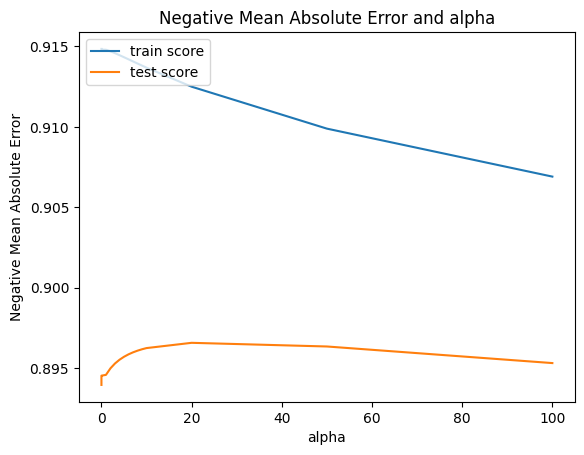

In [717]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [718]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [719]:
# View coefficients for each parameter
model_parameters_ridge = list(sorted(ridge.coef_))
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters_ridge = list((zip(cols, model_parameters_ridge)))

In [720]:
## Define a function for checking multiple metrics for each model 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = {}
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric["R-Squared (Train)"] = r2_score(y_train, y_train_pred)
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric["R-Squared (Test)"] = r2_score(y_test, y_pred)
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric["RSS (Train)"] = rss_train
    rss_test = np.sum(np.square(y_test - y_pred))
    metric["RSS (Test)"] = rss_test
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric["MSE (Train)"] = mse_train
    mse_test = mean_squared_error(y_test, y_pred)
    metric["MSE (Test)"] = mse_test
    
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    
    # Root Mean Squared Error for train and test datass
    rmse_train = mse_train**0.5
    metric["RMSE (Train)"] = rmse_train
    rmse_test = mse_test**0.5
    metric["RMSE (Test)"] = rmse_test
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [721]:
## Make predictions
ridge_y_train_pred = ridge.predict(X_train)
ridge_y_pred = ridge.predict(X_test)

In [722]:
## Check metrics
ridge_metrics = show_metrics(y_train, ridge_y_train_pred, y_test, ridge_y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.89
RSS (Train) = 11.50
RSS (Test) = 5.70
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


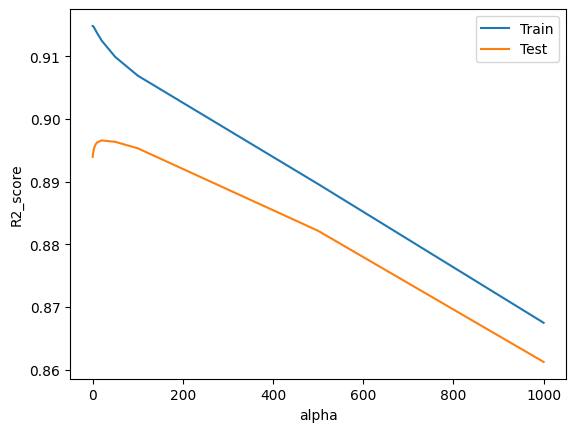

In [723]:
## Plotting R2 score vs alpha values
ridgeCV_results= pd.DataFrame(model_cv.cv_results_)
ridgeCV_results
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
# plt.xscale('log')
plt.legend()
plt.show()

Observations:
- As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error
- From graph also, we can observe that the optimal value of alpha is 20, there is sudden shift happening around 20

### Section 5.2: Lasso regression

In [724]:
# List of alphas for lasso regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

folds = 10
# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [725]:
# View the optimal value of alpha
lasso_model_cv.best_params_


{'alpha': 0.001}

In [726]:
# View the optimal value of alpha
lasso_model_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_model_cv_results = cv_results[cv_results['param_alpha']<=100]
lasso_model_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.008278      0.003642         0.003054        0.003750            0   
1        0.006300      0.003450         0.003314        0.003208            0   
2        0.009269      0.006436         0.002399        0.003664            0   
3        0.009379      0.007658         0.000851        0.002553            0   
4        0.009140      0.006054         0.000919        0.001404            0   
5        0.007242      0.006838         0.003778        0.006233            0   
6        0.002985      0.004832         0.002364        0.005201            0   
7        0.008504      0.007167         0.002214        0.004874            0   
8        0.013475      0.005420         0.001815        0.004743            0   
9        0.003977      0.006228         0.002737        0.005021            0   
10       0.008614      0.008071         0.008680        0.014166            0   
11       0.007859      0.007281         0.001562        0.004686            0   
12       0.005521      0.006253         0.001982        0.004621            0   
13       0.010033      0.007138         0.001972        0.004712            1   
14       0.005139      0.006992         0.000000        0.000000            2   
15       0.008467      0.007532         0.003064        0.006131            3   
16       0.008726      0.006604         0.002998        0.004714            4   
17       0.009066      0.007457         0.000351        0.001054            5   
18       0.005333      0.006754         0.005388        0.007008            6   
19       0.006419      0.006551         0.003791        0.006058            7   
20       0.007345      0.007794         0.003128        0.006257            8   
21       0.010511      0.007016         0.000825        0.002474            9   
22       0.005541      0.007061         0.001502        0.004505           10   
23       0.009714      0.005258         0.000418        0.000837           20   
24       0.004966      0.007619         0.005735        0.007161           50   
25       0.005125      0.006706         0.001562        0.004685          100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.918427           0.921163   
1    {'alpha': 0.001}           0.918427           0.921165   
2     {'alpha': 0.01}           0.918431           0.921180   
3     {'alpha': 0.05}           0.918447           0.921246   
4      {'alpha': 0.1}           0.918467           0.921327   
5      {'alpha': 0.2}           0.918502           0.921484   
6      {'alpha': 0.3}           0.918532           0.921633   
7      {'alpha': 0.4}           0.918557           0.921776   
8      {'alpha': 0.5}           0.918580           0.921913   
9      {'alpha': 0.6}           0.918599           0.922044   
10     {'alpha': 0.7}           0.918616           0.922171   
11     {'alpha': 0.8}           0.918630           0.922292   
12     {'alpha': 0.9}           0.918642           0.922409   
13     {'alpha': 1.0}           0.918652           0.922523   
14     {'alpha': 2.0}           0.918685           0.923474   
15     {'alpha': 3.0}           0.918650           0.924198   
16     {'alpha': 4.0}           0.918584           0.924775   
17     {'alpha': 5.0}           0.918504           0.925253   
18     {'alpha': 6.0}           0.918416           0.925656   
19     {'alpha': 7.0}           0.918324           0.926005   
20     {'alpha': 8.0}           0.918231           0.926310   
21     {'alpha': 9.0}           0.918138           0.926581   
22    {'alpha': 10.0}           0.918045           0.926824   
23      {'alpha': 20}           0.917208           0.928408   
24      {'alpha': 50}           0.915452           0.930429   
25     {'alpha': 100}           0.913301           0.931747   

    split2_test_score  split3_test_score  split4_test_score  \
0            0.886889           0.886209           

Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [727]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [728]:
# Fit the model on training data
lasso.fit(X_train, y_train)


Lasso(alpha=0.001)

In [729]:
# Make predictions
lasso_y_train_pred = lasso.predict(X_train)
lasso_y_pred = lasso.predict(X_test)

In [730]:
## Check metrics for lasso model
lasso_metrics = show_metrics(y_train, lasso_y_train_pred, y_test, lasso_y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.89
RSS (Train) = 11.80
RSS (Test) = 5.78
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


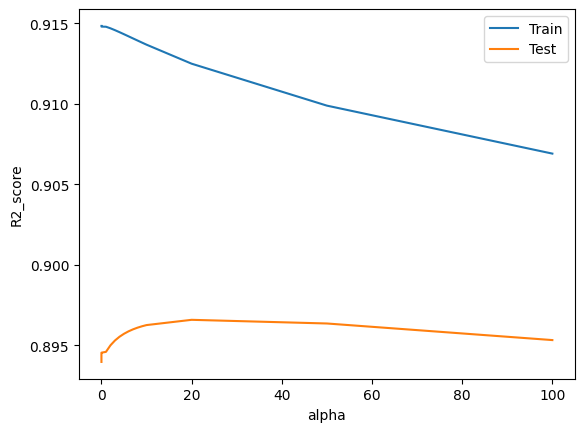

In [731]:
## Plotting R2 score vs alpha values
plt.plot(lasso_model_cv_results['param_alpha'], lasso_model_cv_results['mean_train_score'], label='Train')
plt.plot(lasso_model_cv_results['param_alpha'], lasso_model_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

As the value of alpha increases, we see a decrease in both train and test error.
However, after a error value of approximately 0.05, error remains constant

In [732]:
# lasso model parameters
lasso_model_parameters = list(sorted(lasso.coef_))
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_model_parameters = list((zip(cols, lasso_model_parameters)))
lasso_model_parameters

[('constant', 11.993),
 ('MSSubClass', -0.073),
 ('LotFrontage', -0.028),
 ('LotArea', -0.025),
 ('OverallQual', -0.024),
 ('OverallCond', -0.022),
 ('MasVnrArea', -0.016),
 ('BsmtFinSF1', -0.012),
 ('BsmtFinSF2', -0.011),
 ('BsmtUnfSF', -0.009),
 ('TotalBsmtSF', -0.009),
 ('2ndFlrSF', -0.008),
 ('LowQualFinSF', -0.007),
 ('GrLivArea', -0.006),
 ('BsmtFullBath', -0.006),
 ('BsmtHalfBath', -0.005),
 ('FullBath', -0.005),
 ('HalfBath', -0.004),
 ('BedroomAbvGr', -0.003),
 ('KitchenAbvGr', -0.001),
 ('Fireplaces', -0.001),
 ('GarageCars', -0.001),
 ('WoodDeckSF', -0.001),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('YrSold', 0.0),
 ('CurrentYear', 0.0),
 ('Age', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', 0.0),
 ('Utilities_NoSeWa', 0.0),
 ('

### Section 5.3: Residual Analysis

Error distribution in train dataset


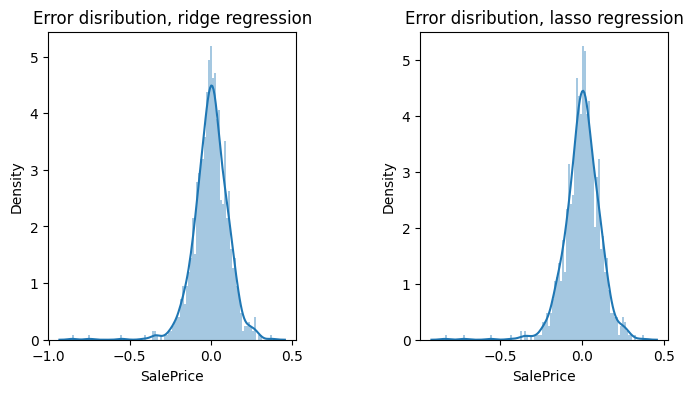

In [733]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - ridge_y_train_pred), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - lasso_y_train_pred), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

Error distribution in test dataset


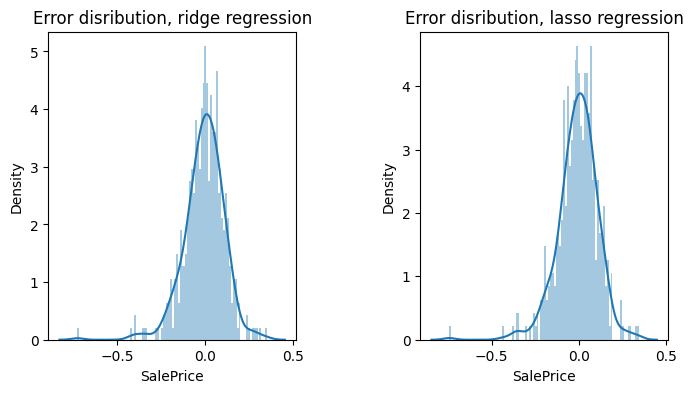

In [734]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - ridge_y_pred), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - lasso_y_pred), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

Observation: Both Errors for train and test are normally distributed with error ranging between -0.5 to 0.5

In [735]:
# All metrics for both models
mDF = pd.DataFrame.from_dict(ridge_metrics, orient='index', columns=['Ridge'])
mDF2 = pd.DataFrame.from_dict(lasso_metrics, orient='index', columns=['Lasso'])
finalMetrics = mDF.join(mDF2)
finalMetrics

Ridge      Lasso
R-Squared (Train)   0.911932   0.909664
R-Squared (Test)    0.888148   0.886552
RSS (Train)        11.498830  11.795021
RSS (Test)          5.699459   5.780742
MSE (Train)         0.011262   0.011552
MSE (Test)          0.013012   0.013198
RMSE (Train)        0.106124   0.107482
RMSE (Test)         0.114072   0.114883

In [736]:
# Coefficients for both models
coeff_df = pd.DataFrame(model_parameters_ridge, columns=["Column","Ridge_Coeff"])
coeff_df.set_index("Column",inplace=True)
coeff_df = coeff_df.join(pd.DataFrame(lasso_model_parameters, columns=["Column","Lasso_Coeff"]).set_index("Column"))

coeff_df = coeff_df.sort_values(by="Lasso_Coeff", ascending=False)

In [737]:
coeff_df['Lasso_Coeff'].sort_values(ascending=False)[:6]

Column
constant                  11.993
PavedDrive_Y               0.086
GarageFinish_Unf           0.075
GarageFinish_RFn           0.072
GarageFinish_No Garage     0.048
GarageType_No Garage       0.043
Name: Lasso_Coeff, dtype: float64

### Conclusion :

#### Score for both Ridge and Lasso regression.
- Ridge : Train :90.9 Test :88.8148
- Lasso : Train :91.1932 Test :88.6552


#### Top 5 most significant variables in Ridge are:
- PavedDrive_Y               0.080
- GarageFinish_Unf           0.073
- GarageFinish_RFn           0.069
- GarageFinish_No Garage     0.048
- GarageType_No Garage       0.043

#### Top 5 most significant variables in Lasso are:
- PavedDrive_Y               0.086
- GarageFinish_Unf           0.075
- GarageFinish_RFn           0.072
- GarageFinish_No Garage     0.048
- GarageType_No Garage       0.043

- Optimal Value of lamda for ridge : 20
- Optimal Value of lamda for Lasso : 0.001

Because of Feature selection as well we can choose Lasso regression in this case.

In [738]:
# Question 1

alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# View coefficients for each parameter
model_parameters_ridge = list(sorted(ridge.coef_))
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters_ridge = list((zip(cols, model_parameters_ridge)))
## Make predictions
ridge_y_train_pred = ridge.predict(X_train)
ridge_y_pred = ridge.predict(X_test)
## Check metrics
ridge_metrics = show_metrics(y_train, ridge_y_train_pred, y_test, ridge_y_pred)


# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.002)
# Fit the model on training data
lasso.fit(X_train, y_train)

# Make predictions
lasso_y_train_pred = lasso.predict(X_train)
lasso_y_pred = lasso.predict(X_test)
## Check metrics for lasso model
lasso_metrics = show_metrics(y_train, lasso_y_train_pred, y_test, lasso_y_pred)
# lasso model parameters
lasso_model_parameters = list(sorted(lasso.coef_))
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_model_parameters = list((zip(cols, lasso_model_parameters)))


R-Squared (Train) = 0.91
R-Squared (Test) = 0.89
RSS (Train) = 11.72
RSS (Test) = 5.72
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11
R-Squared (Train) = 0.91
R-Squared (Test) = 0.89
RSS (Train) = 12.16
RSS (Test) = 5.85
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.12


In [739]:
# All metrics for both models
mDF = pd.DataFrame.from_dict(ridge_metrics, orient='index', columns=['Ridge'])
mDF2 = pd.DataFrame.from_dict(lasso_metrics, orient='index', columns=['Lasso'])
finalMetrics = mDF.join(mDF2)
finalMetrics

Ridge      Lasso
R-Squared (Train)   0.910250   0.906836
R-Squared (Test)    0.887716   0.885208
RSS (Train)        11.718442  12.164195
RSS (Test)          5.721457   5.849266
MSE (Train)         0.011477   0.011914
MSE (Test)          0.013063   0.013354
RMSE (Train)        0.107133   0.109151
RMSE (Test)         0.114292   0.115562

In [740]:
# Coefficients for both models
coeff_df = pd.DataFrame(model_parameters_ridge, columns=["Column","Ridge_Coeff"])
coeff_df.set_index("Column",inplace=True)
coeff_df = coeff_df.join(pd.DataFrame(lasso_model_parameters, columns=["Column","Lasso_Coeff"]).set_index("Column"))

coeff_df = coeff_df.sort_values(by="Lasso_Coeff", ascending=False)

In [741]:
coeff_df['Lasso_Coeff'].sort_values(ascending=False)[:6]

Column
constant                  12.002
PavedDrive_Y               0.090
GarageFinish_Unf           0.076
GarageFinish_RFn           0.066
GarageFinish_No Garage     0.042
GarageType_No Garage       0.037
Name: Lasso_Coeff, dtype: float64

In [742]:
coeff_df['Ridge_Coeff'].sort_values(ascending=False)[:6]

Column
constant                  12.007
PavedDrive_Y               0.079
GarageFinish_Unf           0.067
GarageFinish_RFn           0.066
GarageFinish_No Garage     0.039
GarageType_No Garage       0.038
Name: Ridge_Coeff, dtype: float64

In [743]:
# Question 3: Lets drop all 5 features PavedDrive_Y,GarageFinish_Unf ,GarageFinish_RFn  ,GarageFinish_No Garage  ,GarageType_No Garage 

X_train_q3 = X_train.drop(columns=["PavedDrive_Y","GarageFinish_Unf" ,"GarageFinish_RFn"  ,"GarageFinish_No Garage"  ,"GarageType_No Garage" ])
X_test_q3 = X_test.drop(columns=["PavedDrive_Y","GarageFinish_Unf" ,"GarageFinish_RFn"  ,"GarageFinish_No Garage"  ,"GarageType_No Garage" ])

In [746]:
# Question 1
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_q3, y_train)
alpha = model_cv.best_params_
alpha

Fitting 10 folds for each of 28 candidates, totalling 280 fits


{'alpha': 20}

In [748]:
# List of alphas for lasso regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

folds = 10
# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_model_cv.fit(X_train_q3, y_train) 
lasso_model_cv.best_params_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


{'alpha': 0.001}

In [754]:
ridge = Ridge(alpha=20)
ridge.fit(X_train_q3, y_train)
# View coefficients for each parameter
model_parameters_ridge = list(sorted(ridge.coef_))
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters_ridge = list((zip(cols, model_parameters_ridge)))
## Make predictions
ridge_y_train_pred = ridge.predict(X_train_q3)
ridge_y_pred = ridge.predict(X_test_q3)
## Check metrics
ridge_metrics = show_metrics(y_train, ridge_y_train_pred, y_test, ridge_y_pred)


# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)
# Fit the model on training data
lasso.fit(X_train_q3, y_train)

# Make predictions
lasso_y_train_pred = lasso.predict(X_train_q3)
lasso_y_pred = lasso.predict(X_test_q3)
## Check metrics for lasso model
lasso_metrics = show_metrics(y_train, lasso_y_train_pred, y_test, lasso_y_pred)
# lasso model parameters
lasso_model_parameters = list(sorted(lasso.coef_))
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_model_parameters = list((zip(cols, lasso_model_parameters)))

R-Squared (Train) = 0.91
R-Squared (Test) = 0.89
RSS (Train) = 11.59
RSS (Test) = 5.77
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11
R-Squared (Train) = 0.91
R-Squared (Test) = 0.89
RSS (Train) = 11.85
RSS (Test) = 5.82
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.12


In [755]:
# Coefficients for both models
coeff_df = pd.DataFrame(model_parameters_ridge, columns=["Column","Ridge_Coeff"])
coeff_df.set_index("Column",inplace=True)
coeff_df = coeff_df.join(pd.DataFrame(lasso_model_parameters, columns=["Column","Lasso_Coeff"]).set_index("Column"))

coeff_df = coeff_df.sort_values(by="Lasso_Coeff", ascending=False)
coeff_df['Lasso_Coeff'].sort_values(ascending=False)[:6]

Column
constant              11.995
GarageType_Detchd      0.087
GarageType_BuiltIn     0.074
GarageType_Attchd      0.072
KitchenQual_TA         0.051
KitchenQual_Gd         0.044
Name: Lasso_Coeff, dtype: float64

In [756]:
coeff_df['Ridge_Coeff'].sort_values(ascending=False)[:6]

Column
constant              12.008
GarageType_Detchd      0.082
GarageType_BuiltIn     0.073
GarageType_Attchd      0.069
KitchenQual_TA         0.051
KitchenQual_Gd         0.045
Name: Ridge_Coeff, dtype: float64